# Project 6 Exercises

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
def plot_ts_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [3]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
            code, "fred", start, end).resample(freq).mean() # .first() or .last() or median . . .
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [4]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
                
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU"
               }

start = datetime.datetime(1948,1,1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq= "M")

In [5]:
def plot_lines(df,
              linewidth = 5,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = 'both')
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    return fig, ax


In [6]:
data["Base: Currency in Circulation ($ Mil)"] = data["Base: Currency in Circulation ($ Mil)"].mul(1000)

Total and Currency in Circulation are related because the total equals the total balances maintained plus currency in circulation.

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_43488/3657088975.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


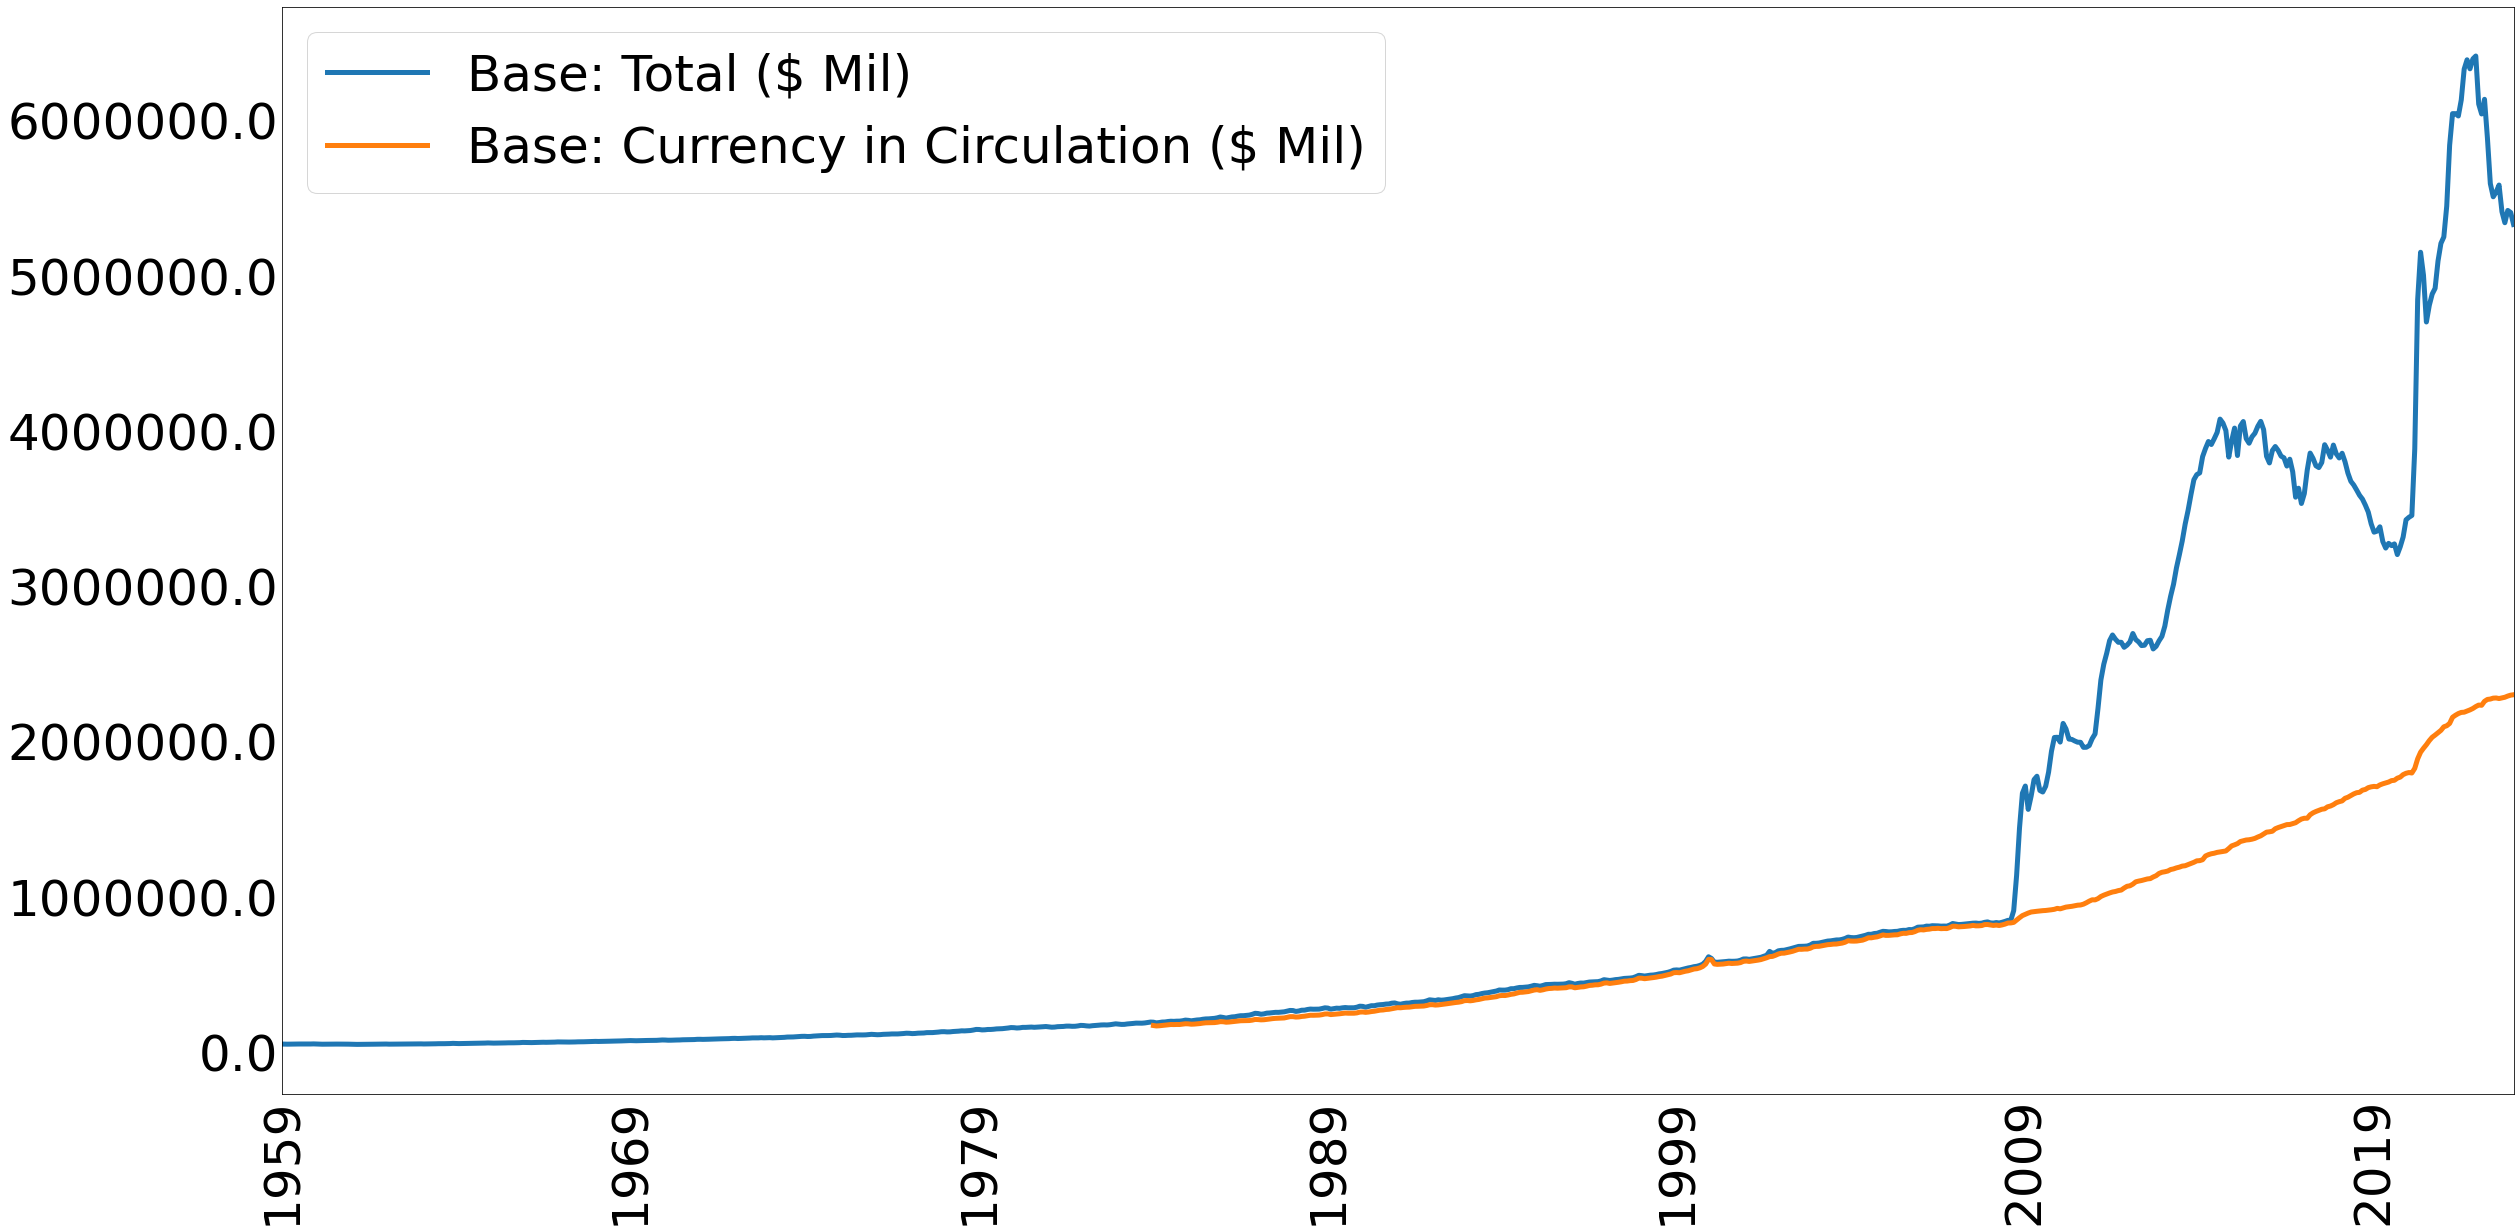

In [7]:
plot_data = data[["Base: Total ($ Mil)",
                "Base: Currency in Circulation ($ Mil)"]]

fig, ax = plot_lines(plot_data)

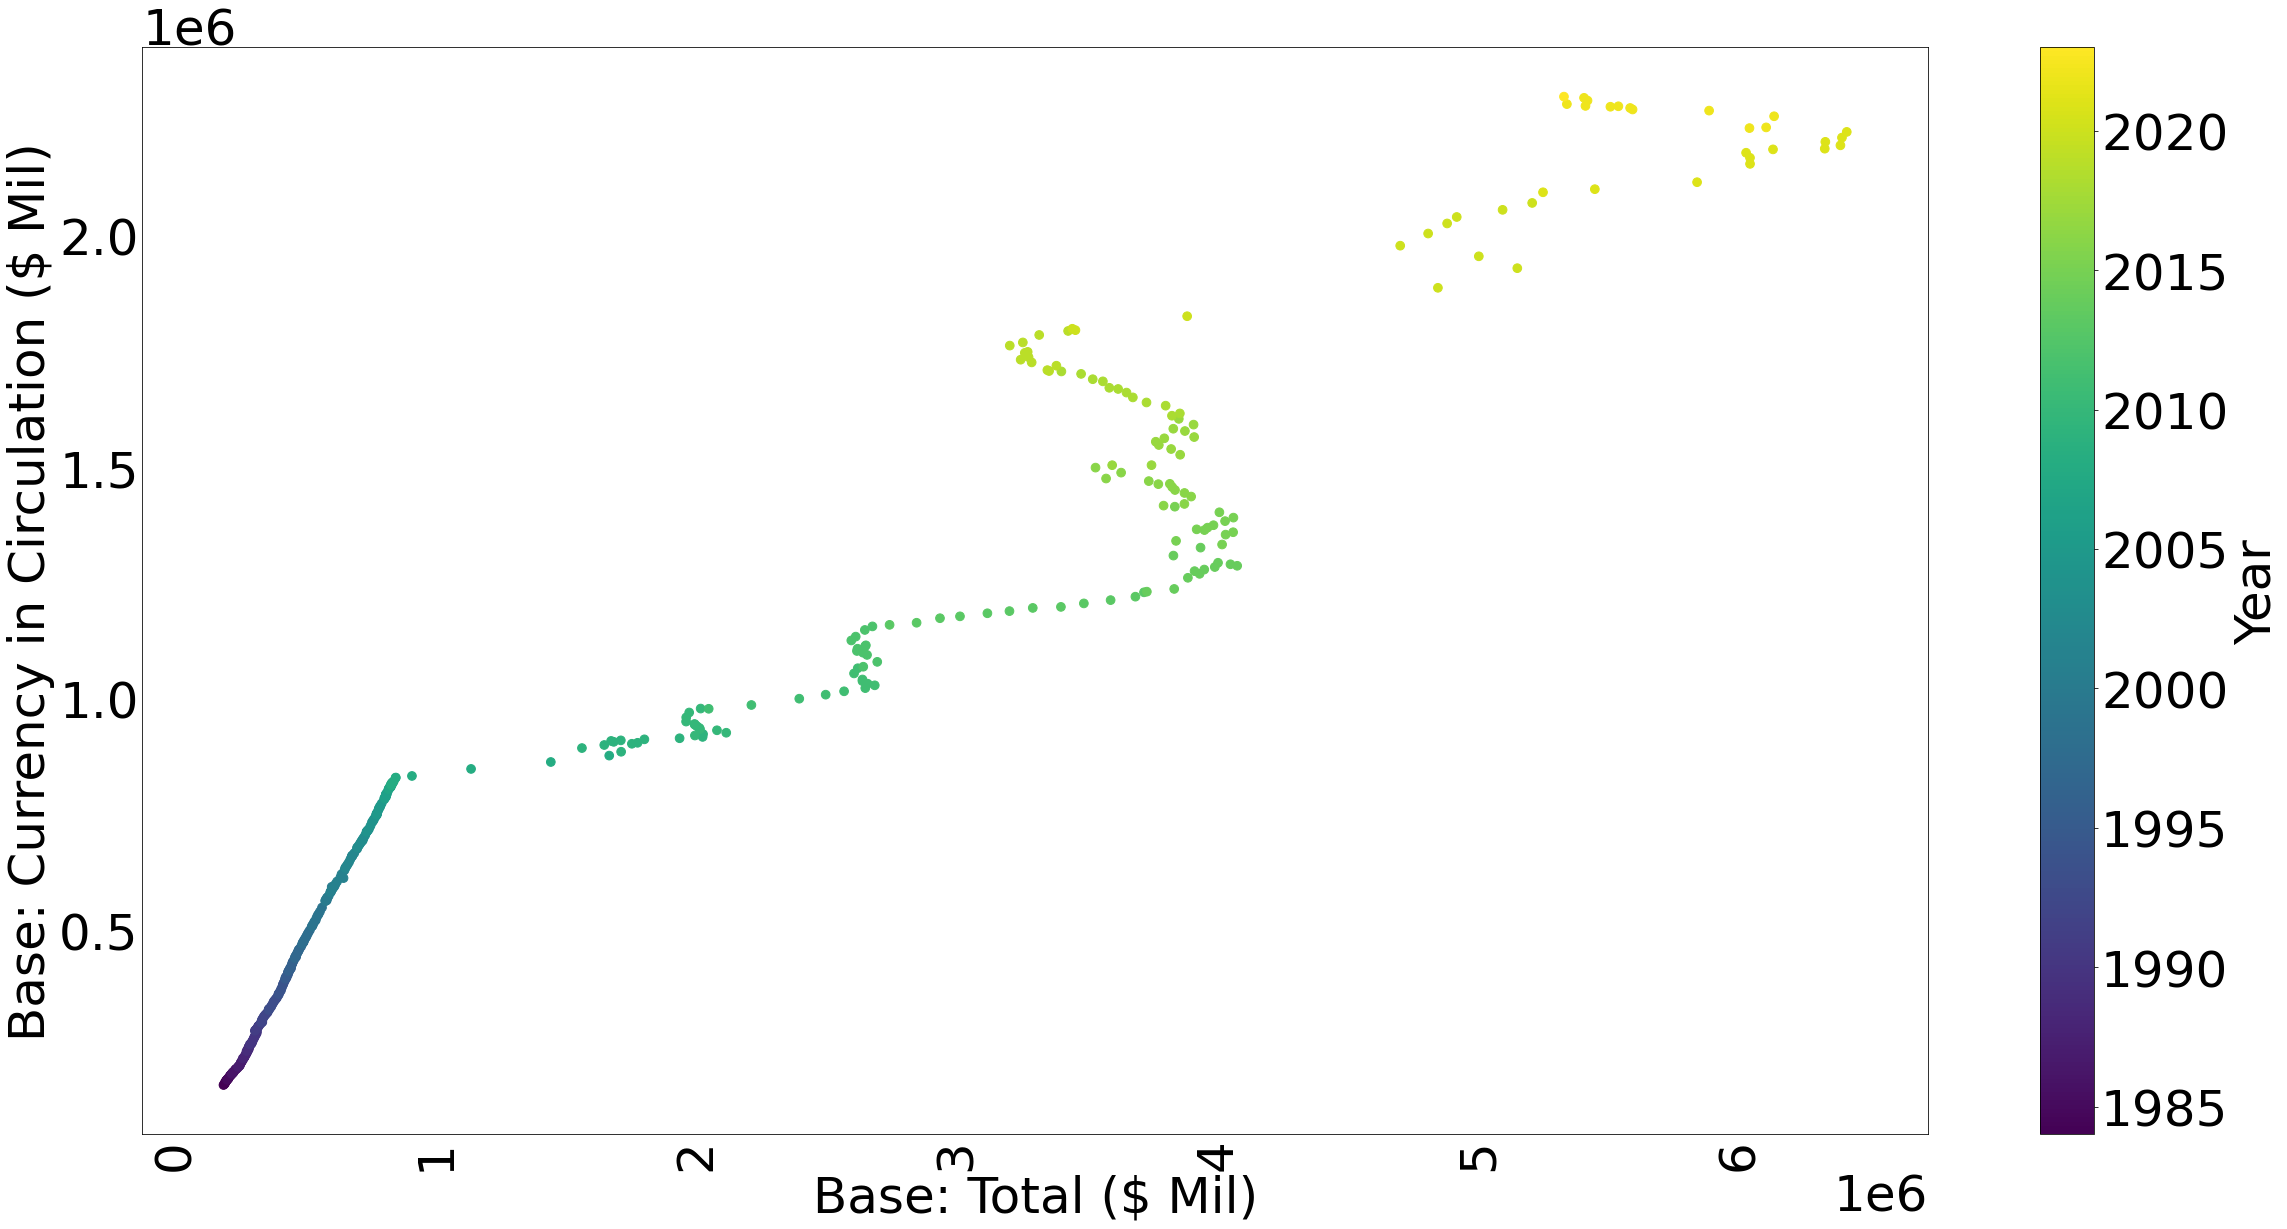

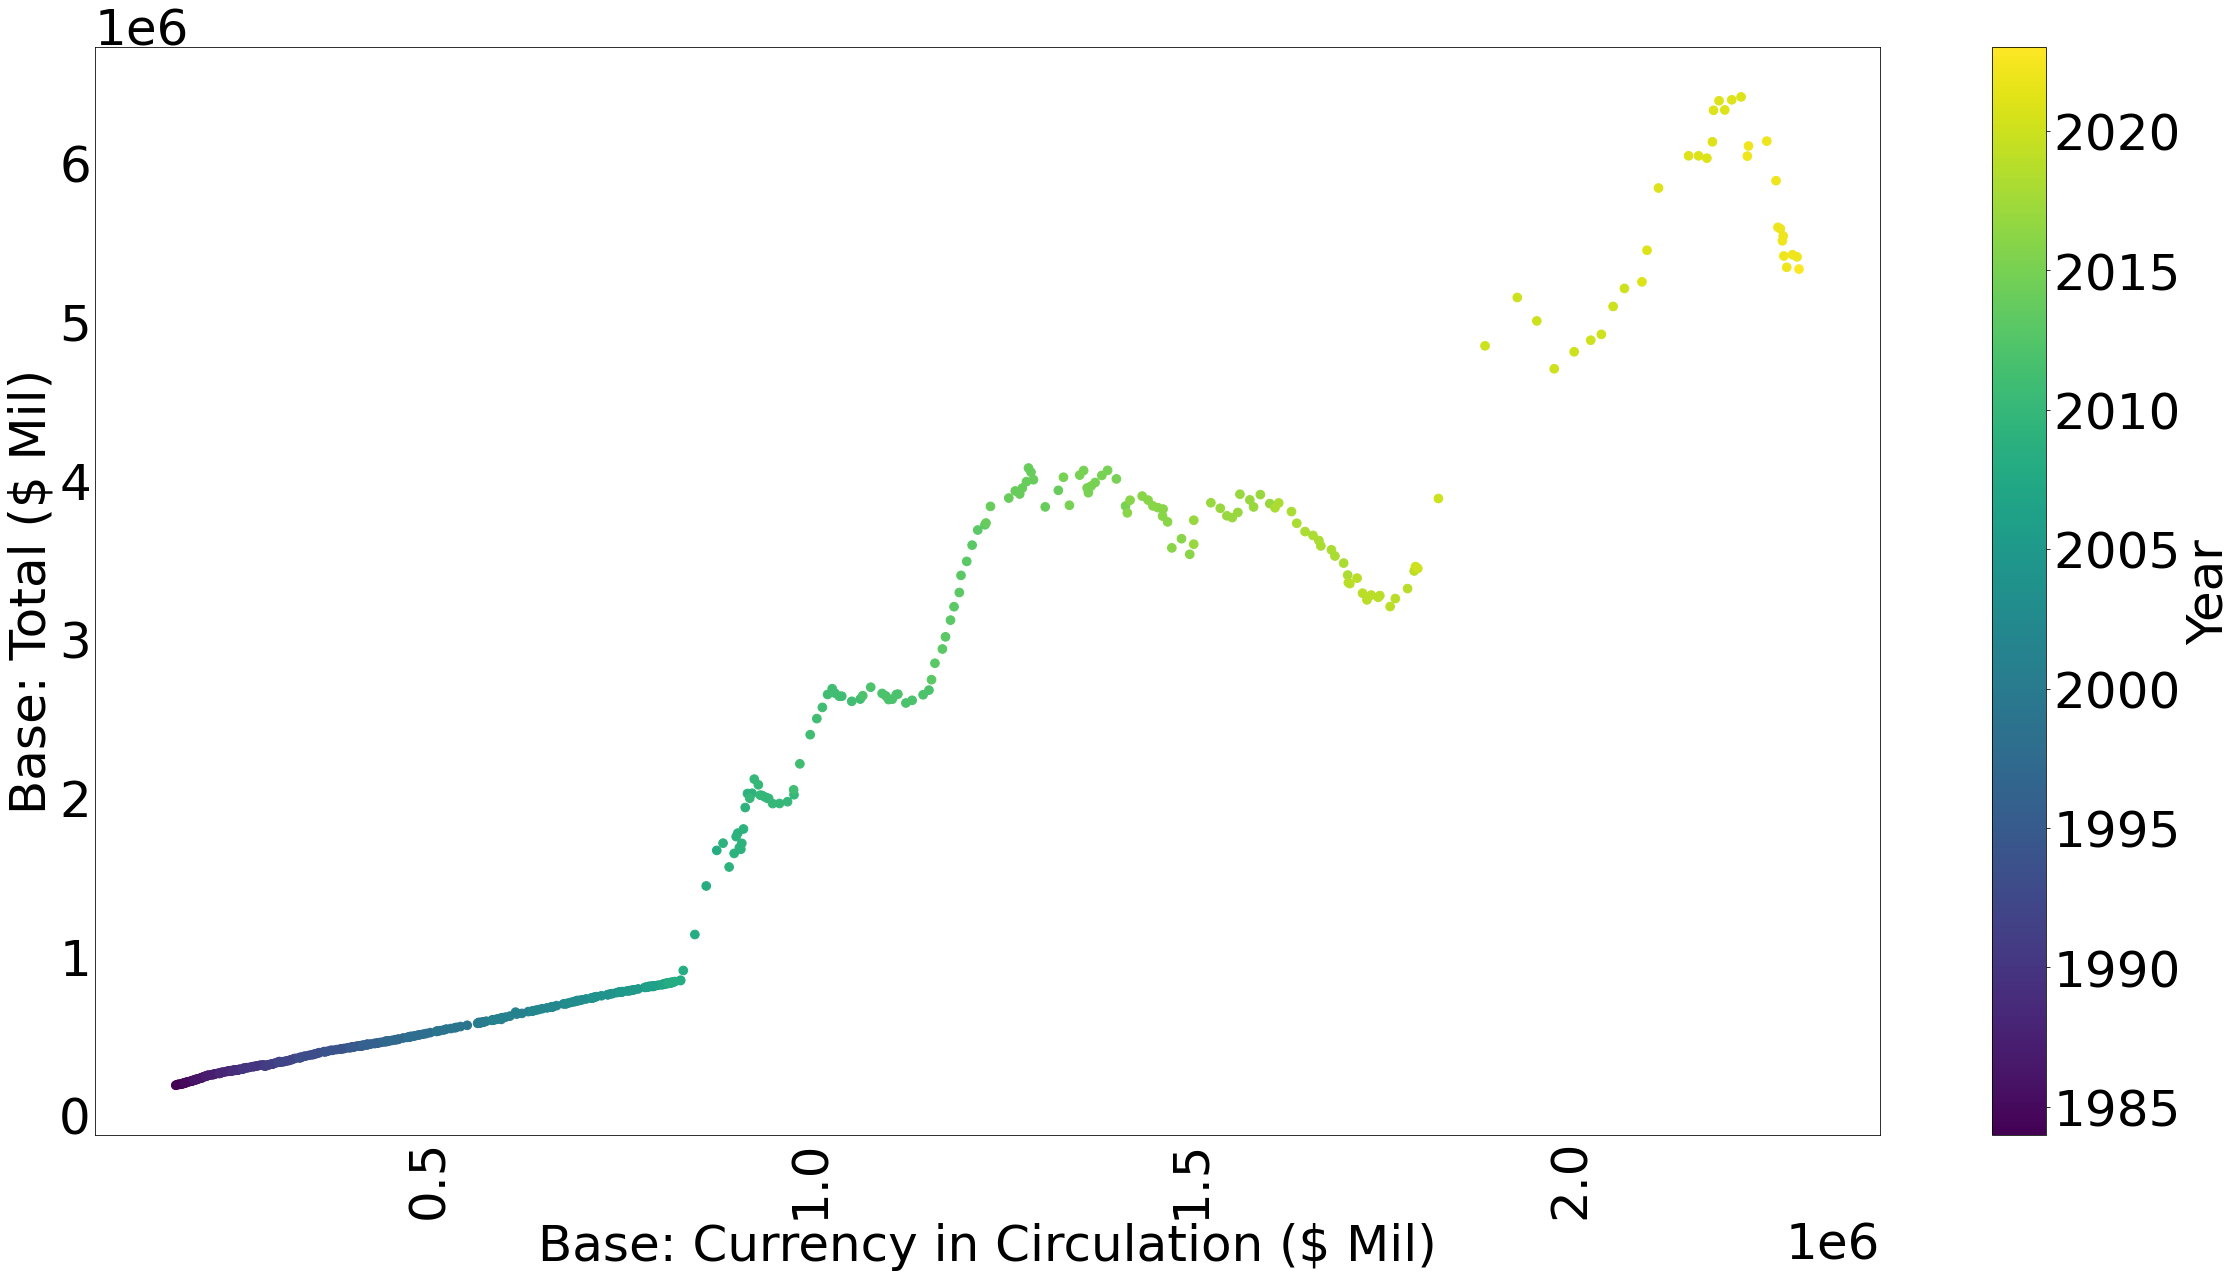

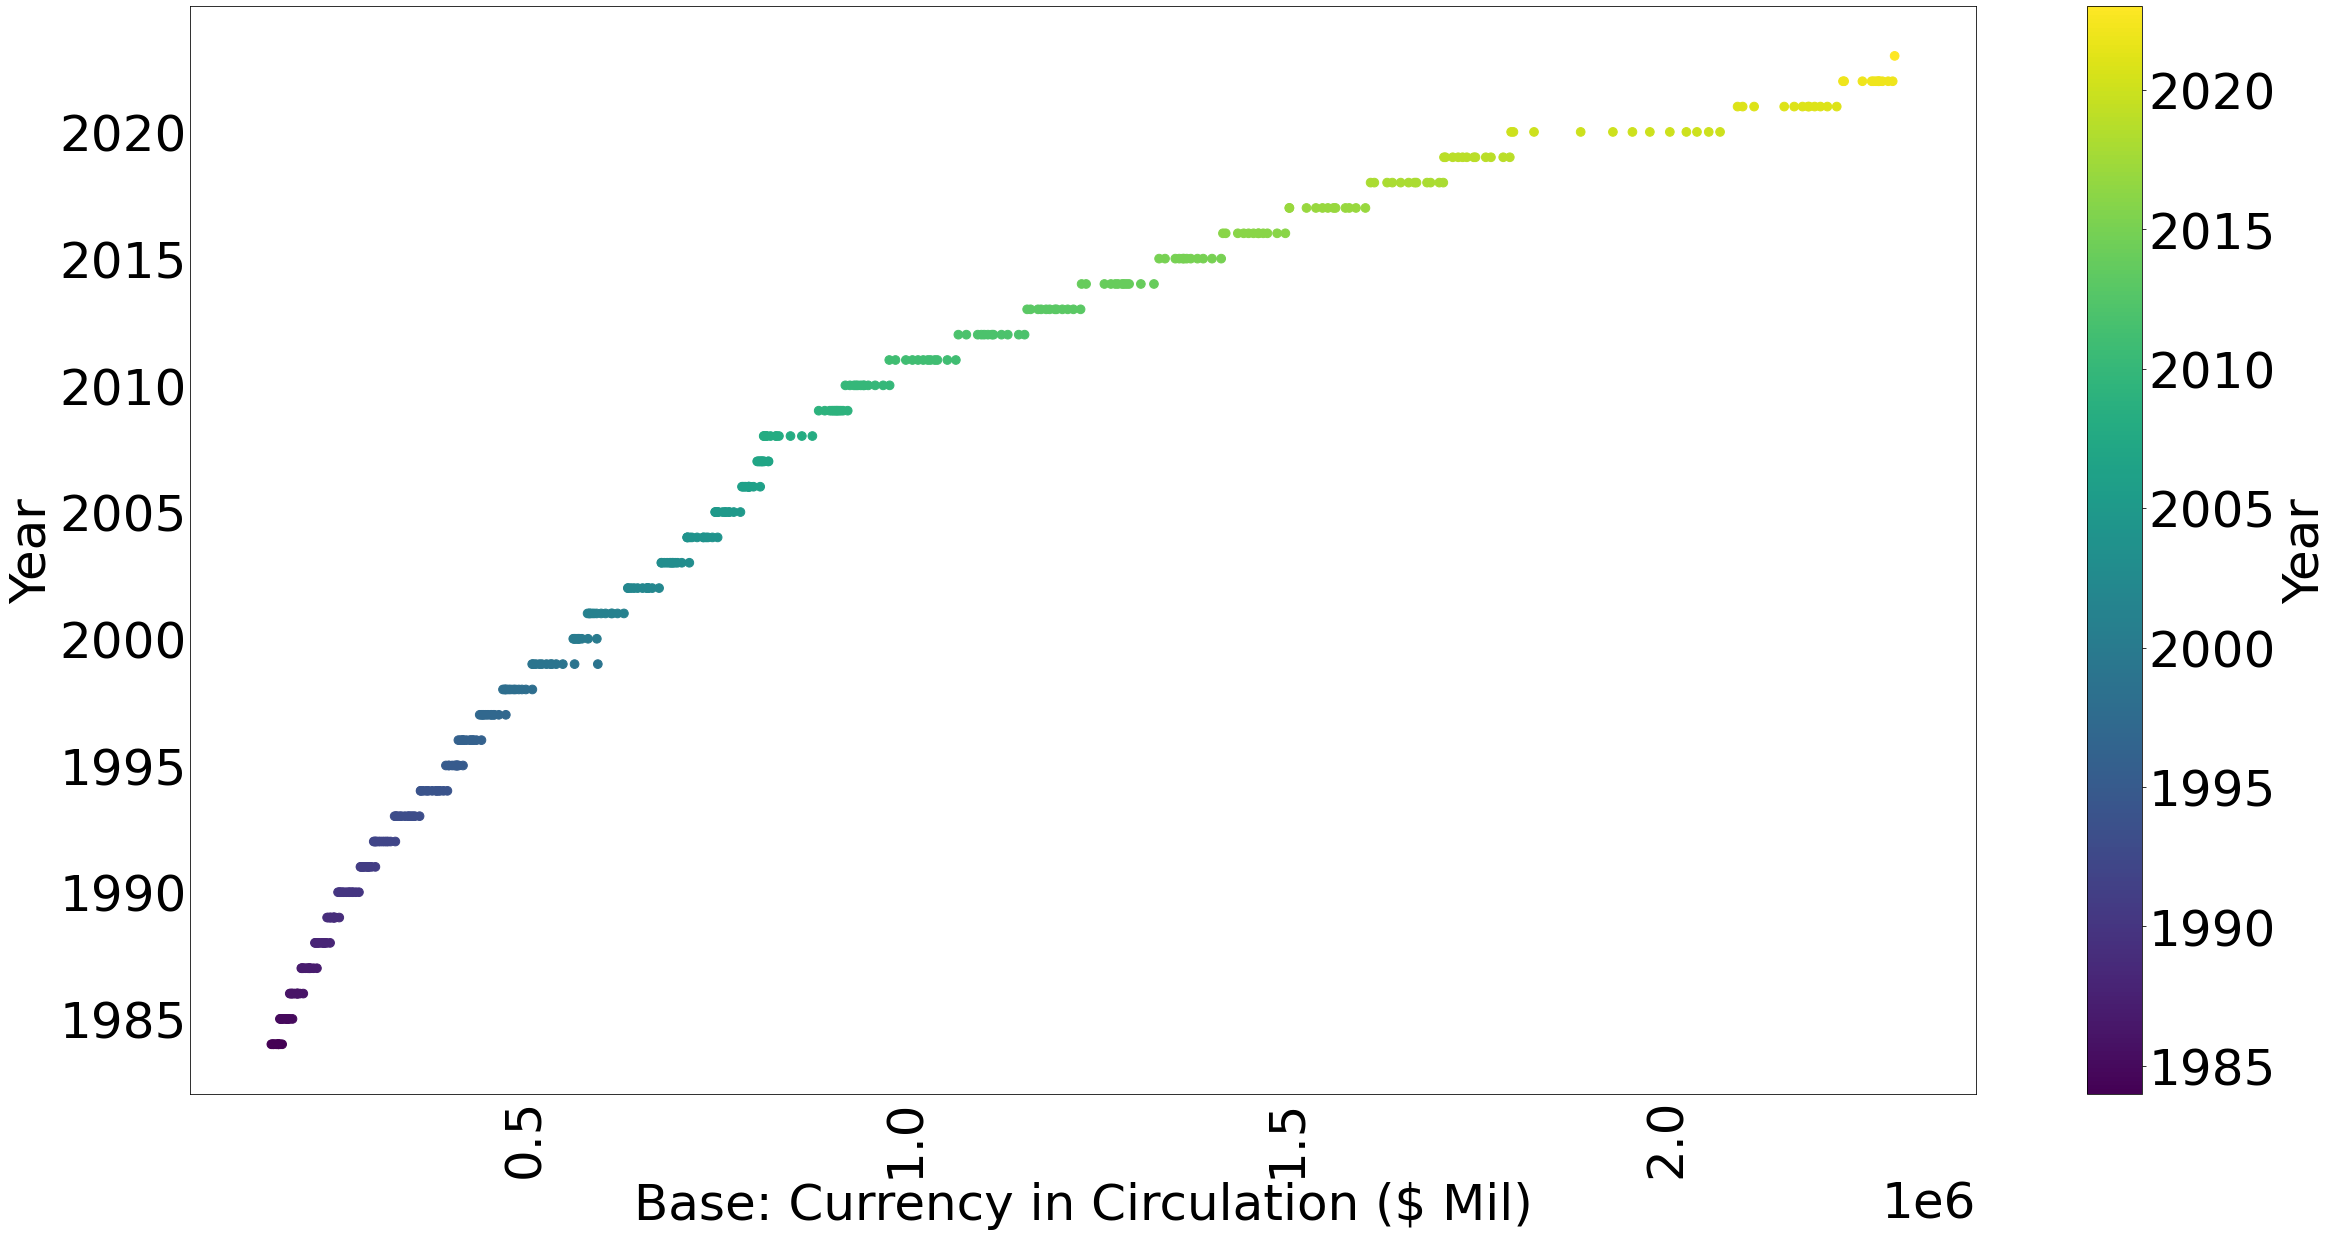

In [8]:
scatter_vars = ["Base: Total ($ Mil)",
                "Base: Currency in Circulation ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

Total Assets and Securities Held Outright are related because securities held outright are a part of the total assets. You can see that in the line graph below.

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_43488/3657088975.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


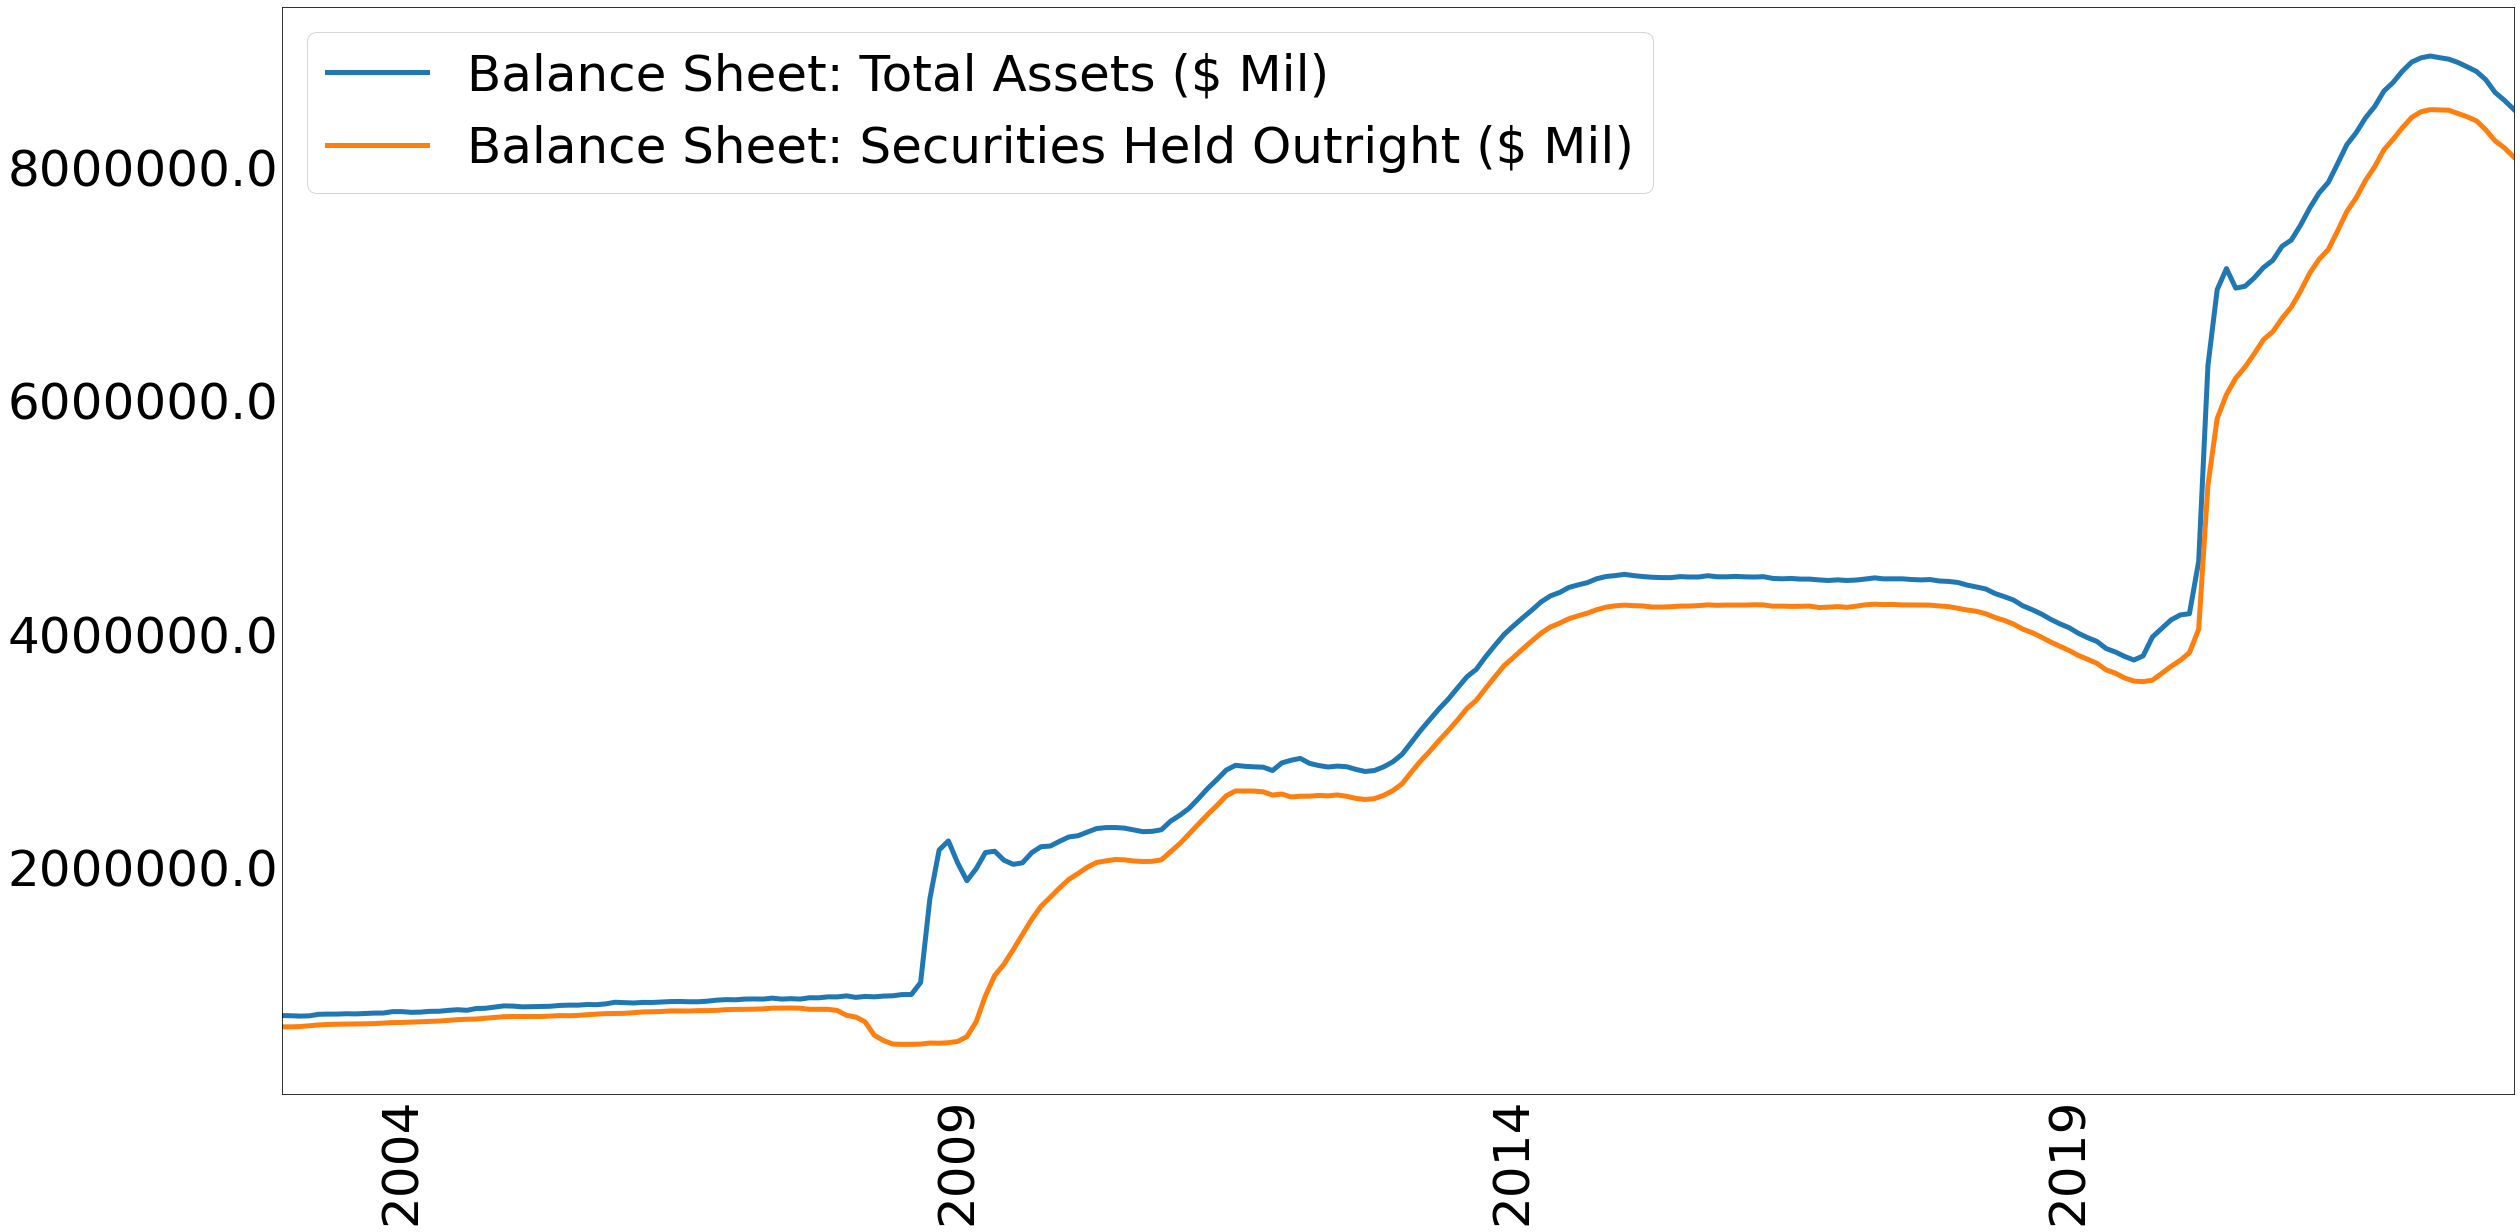

In [9]:
plot_data = data[["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)"]]

fig, ax = plot_lines(plot_data)

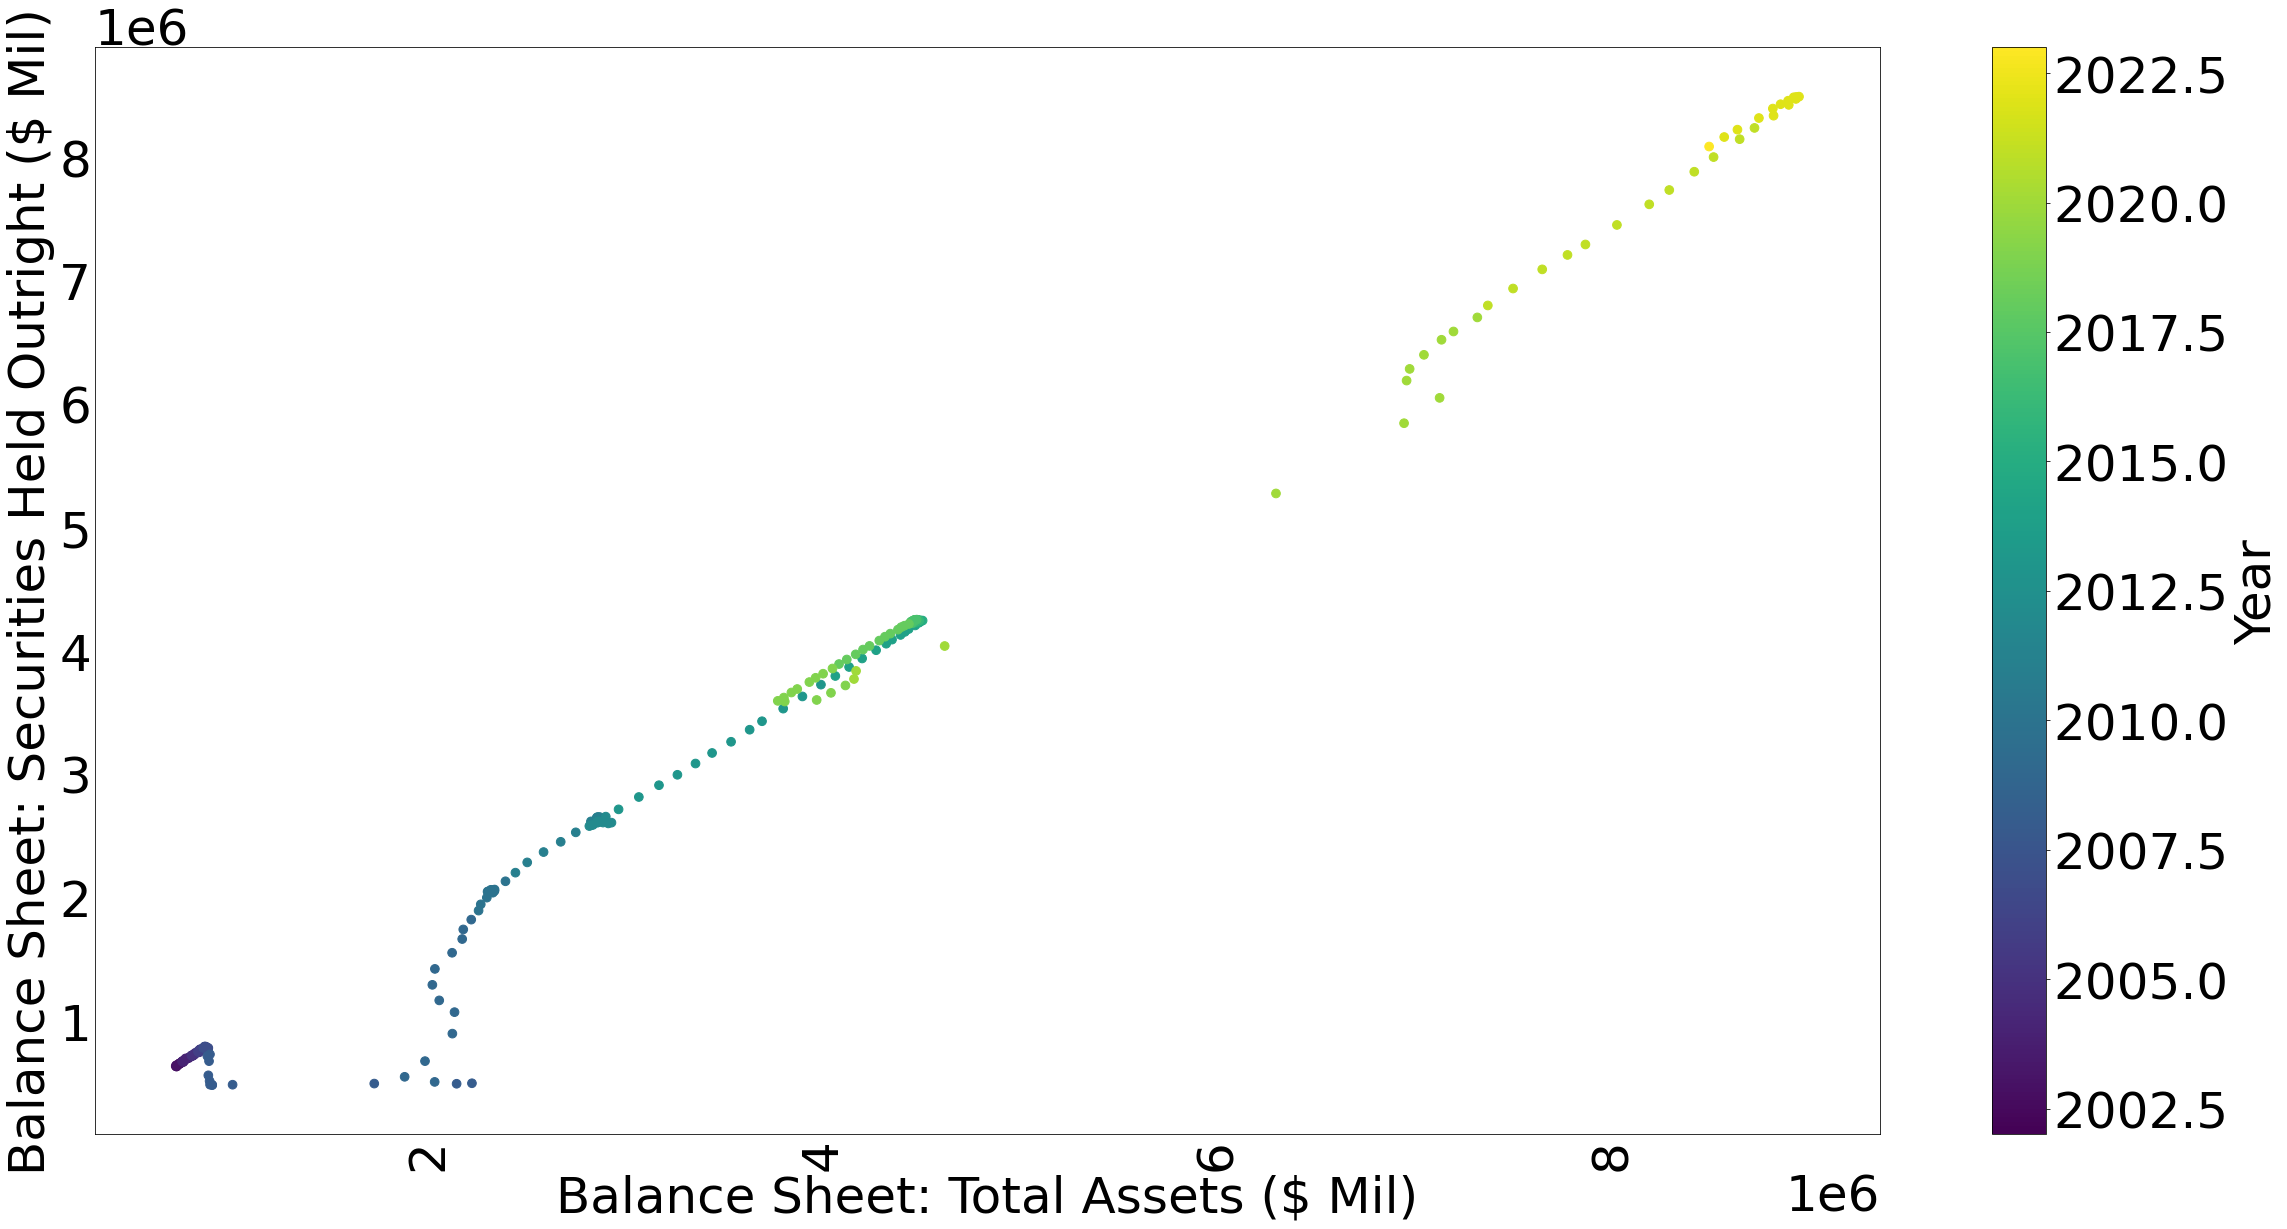

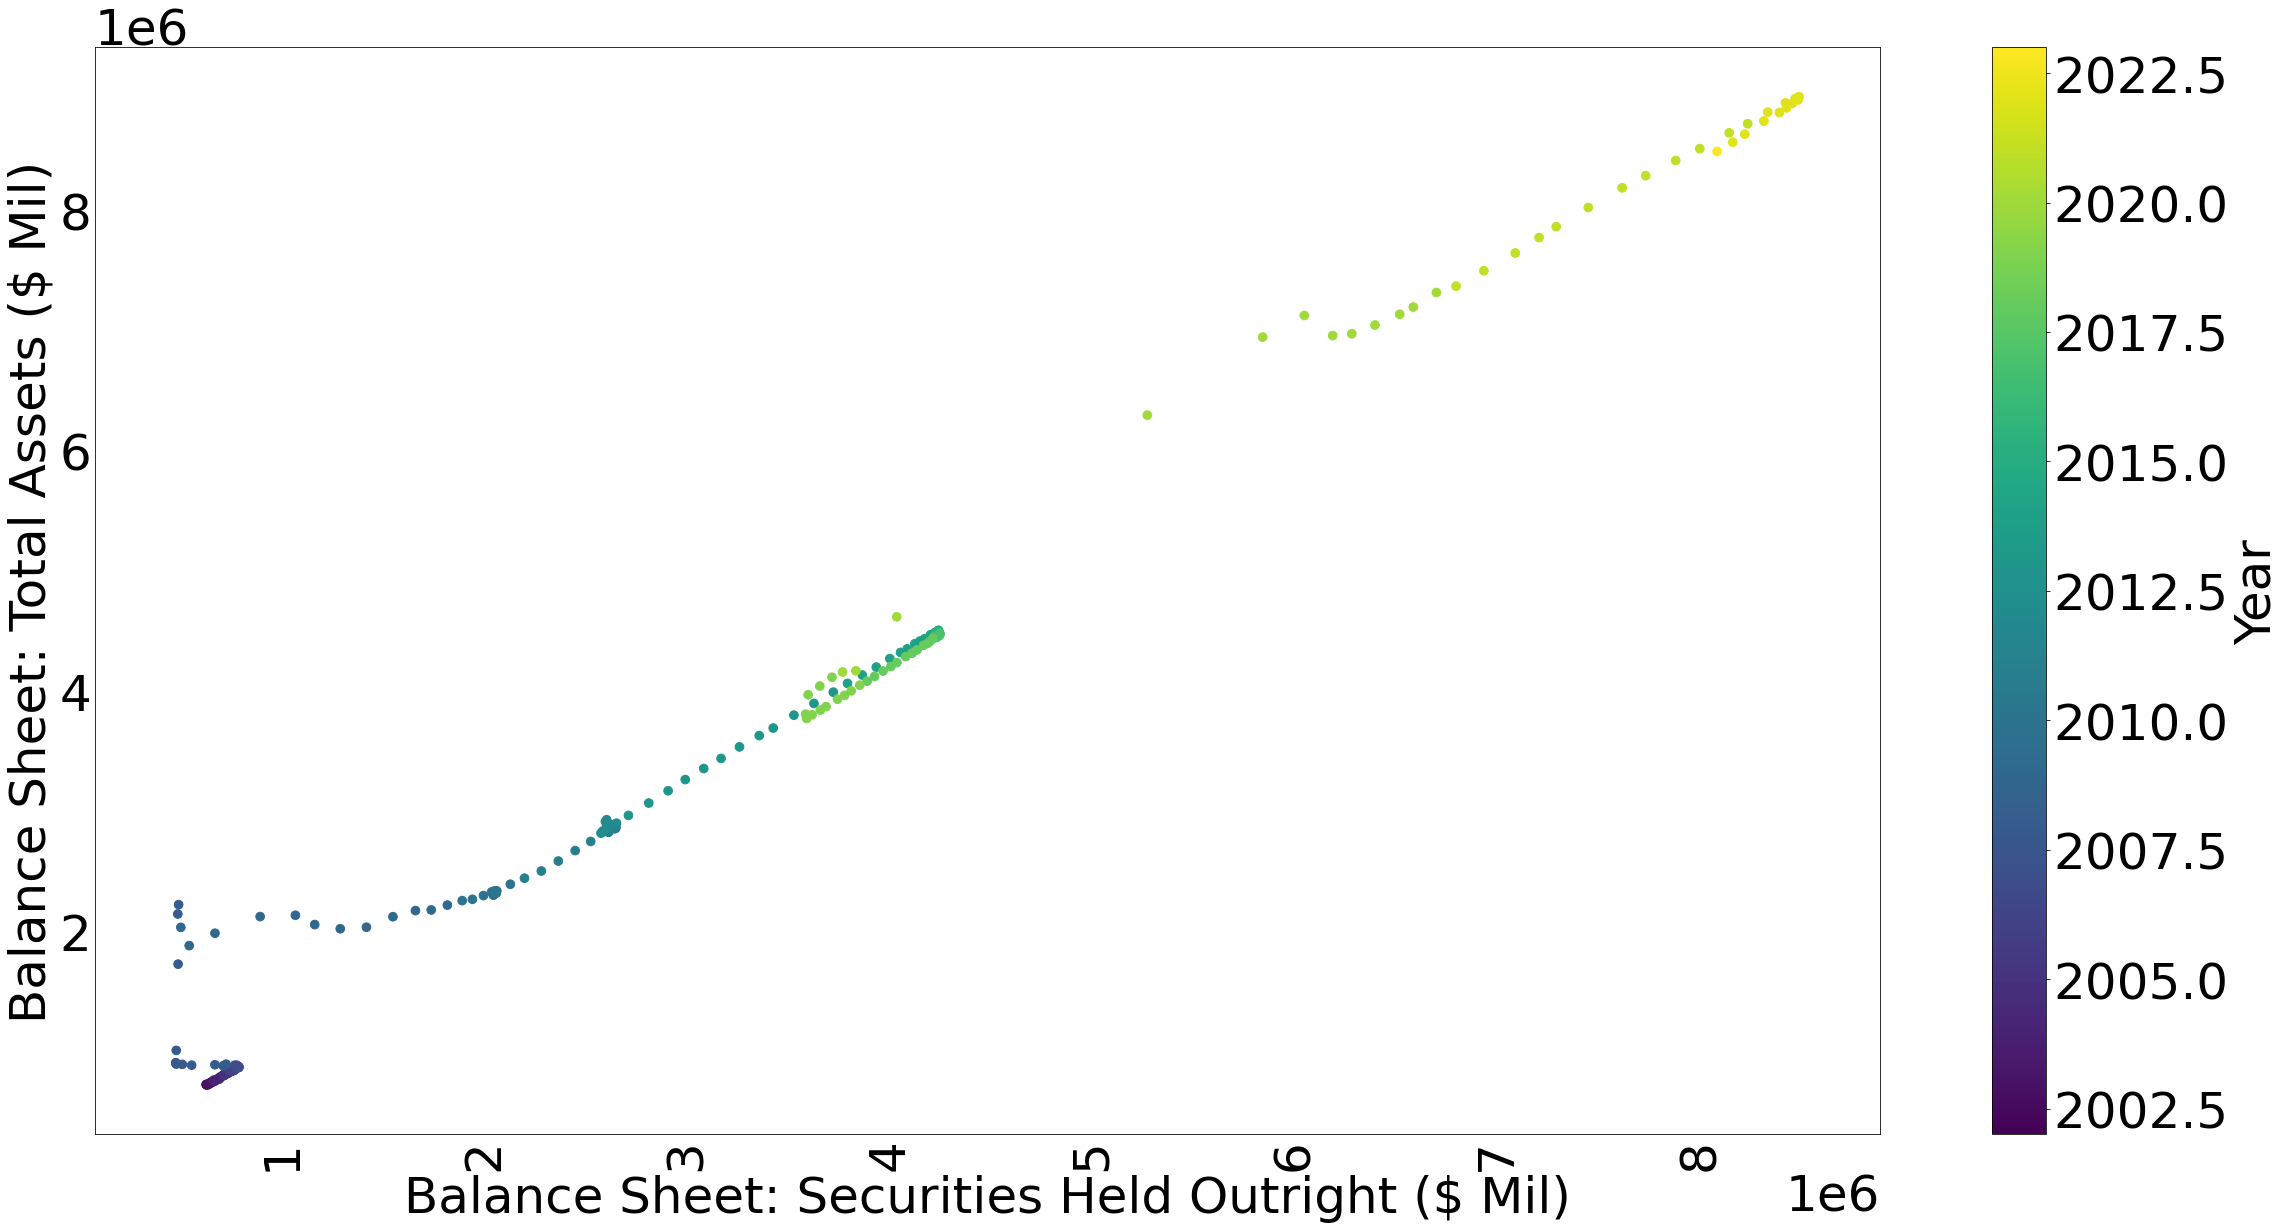

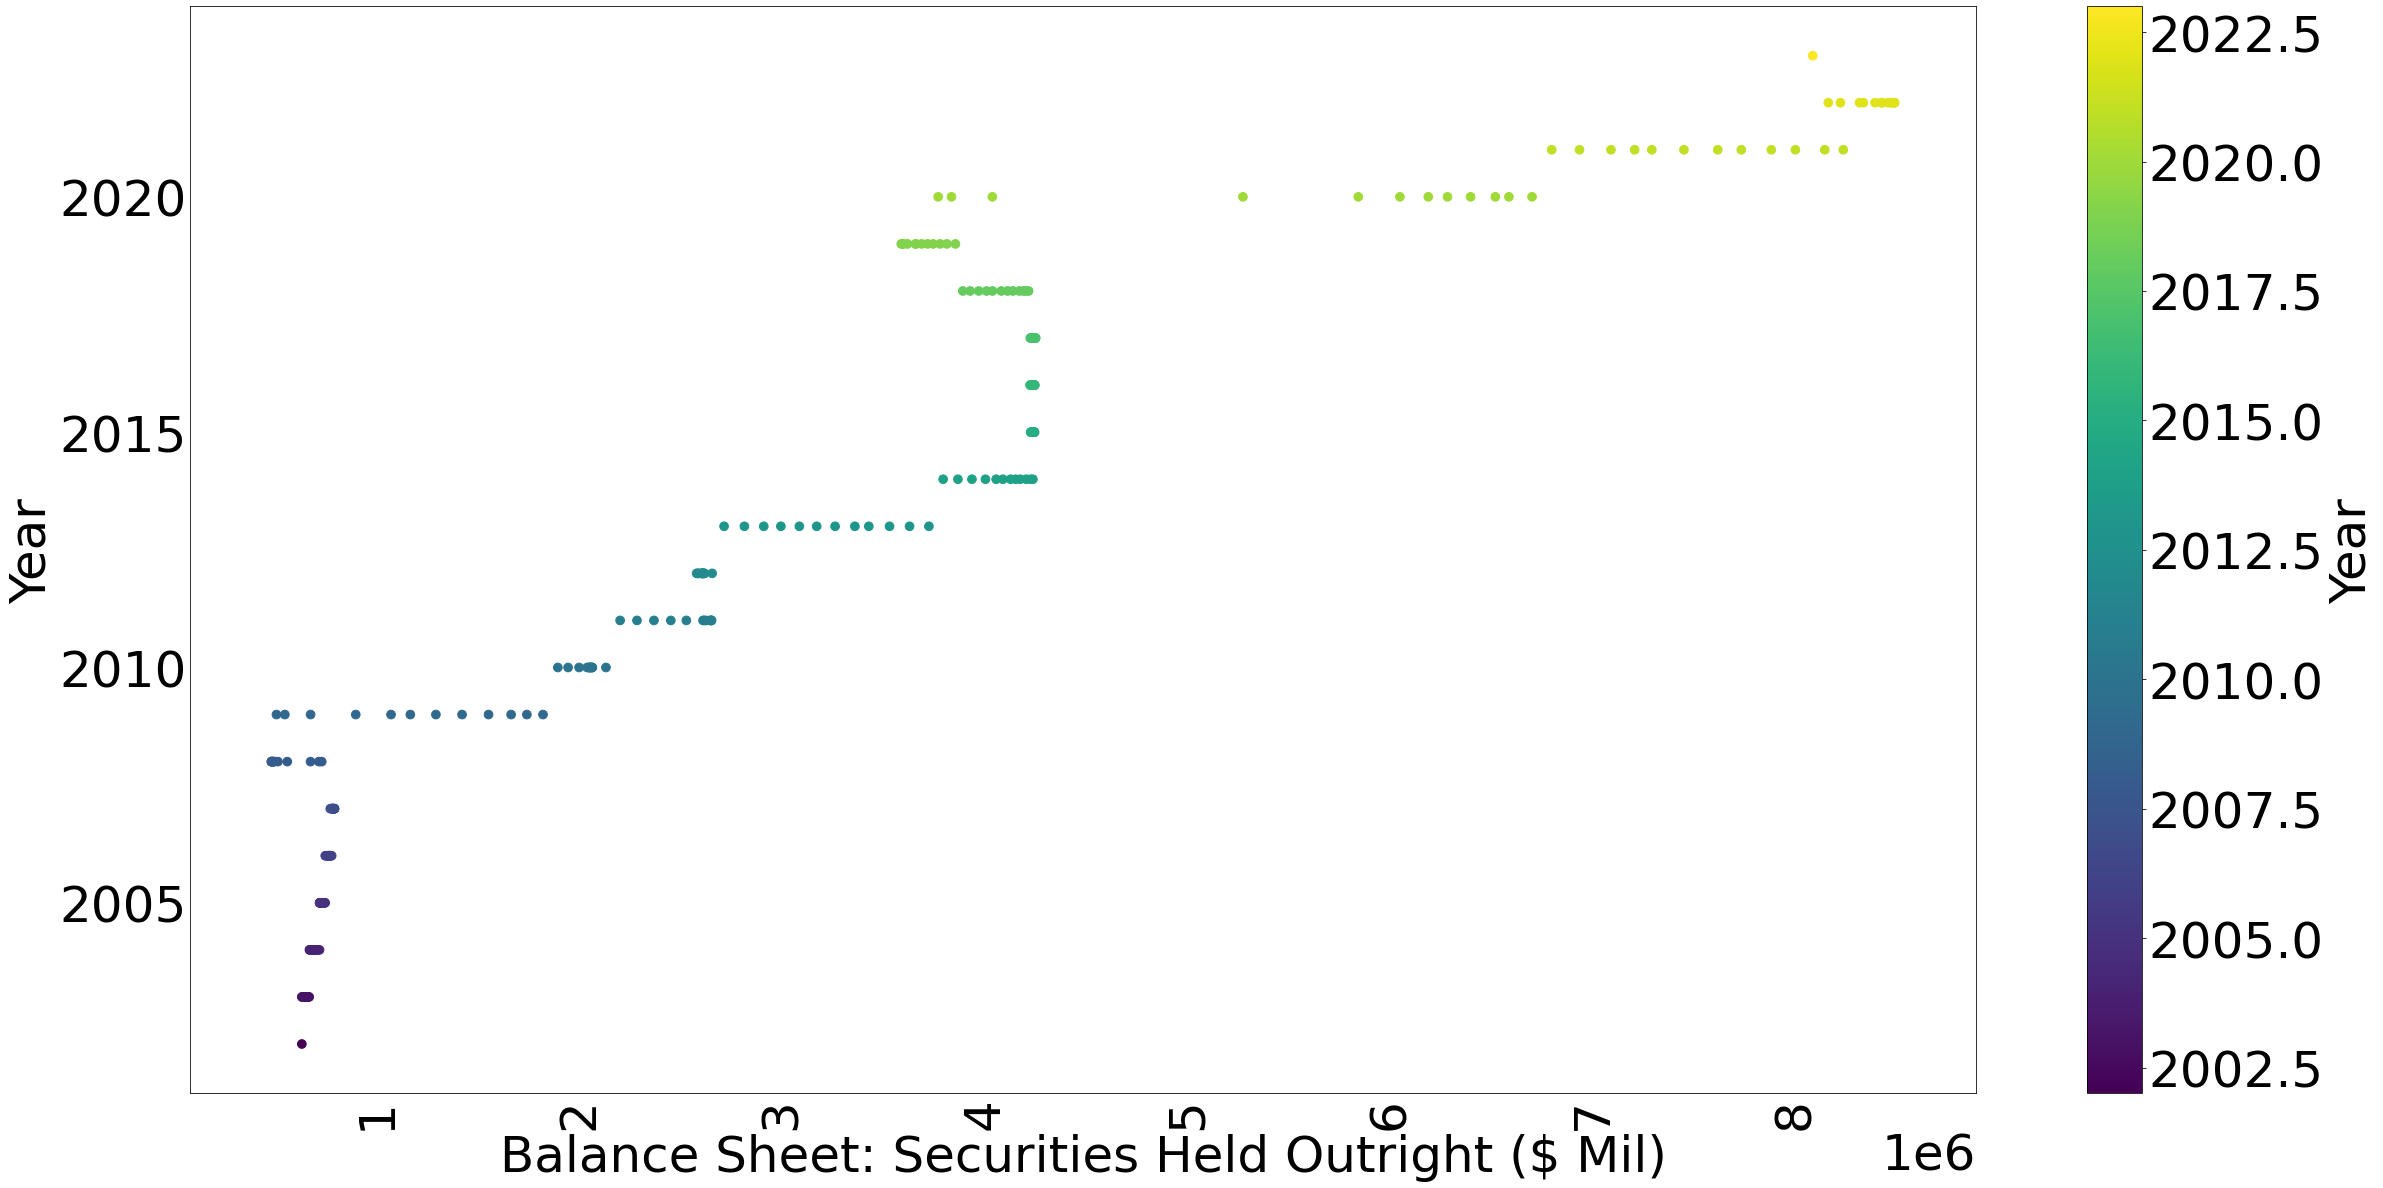

In [10]:
scatter_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

Federal Fund Target (Pre-Crisis) and Federal Funds (Upper) Target are related because the pre-crisis refers to the fund target before the big recession in 2008/2009. The upper target is the federal funds target after the recession.

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_43488/3657088975.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


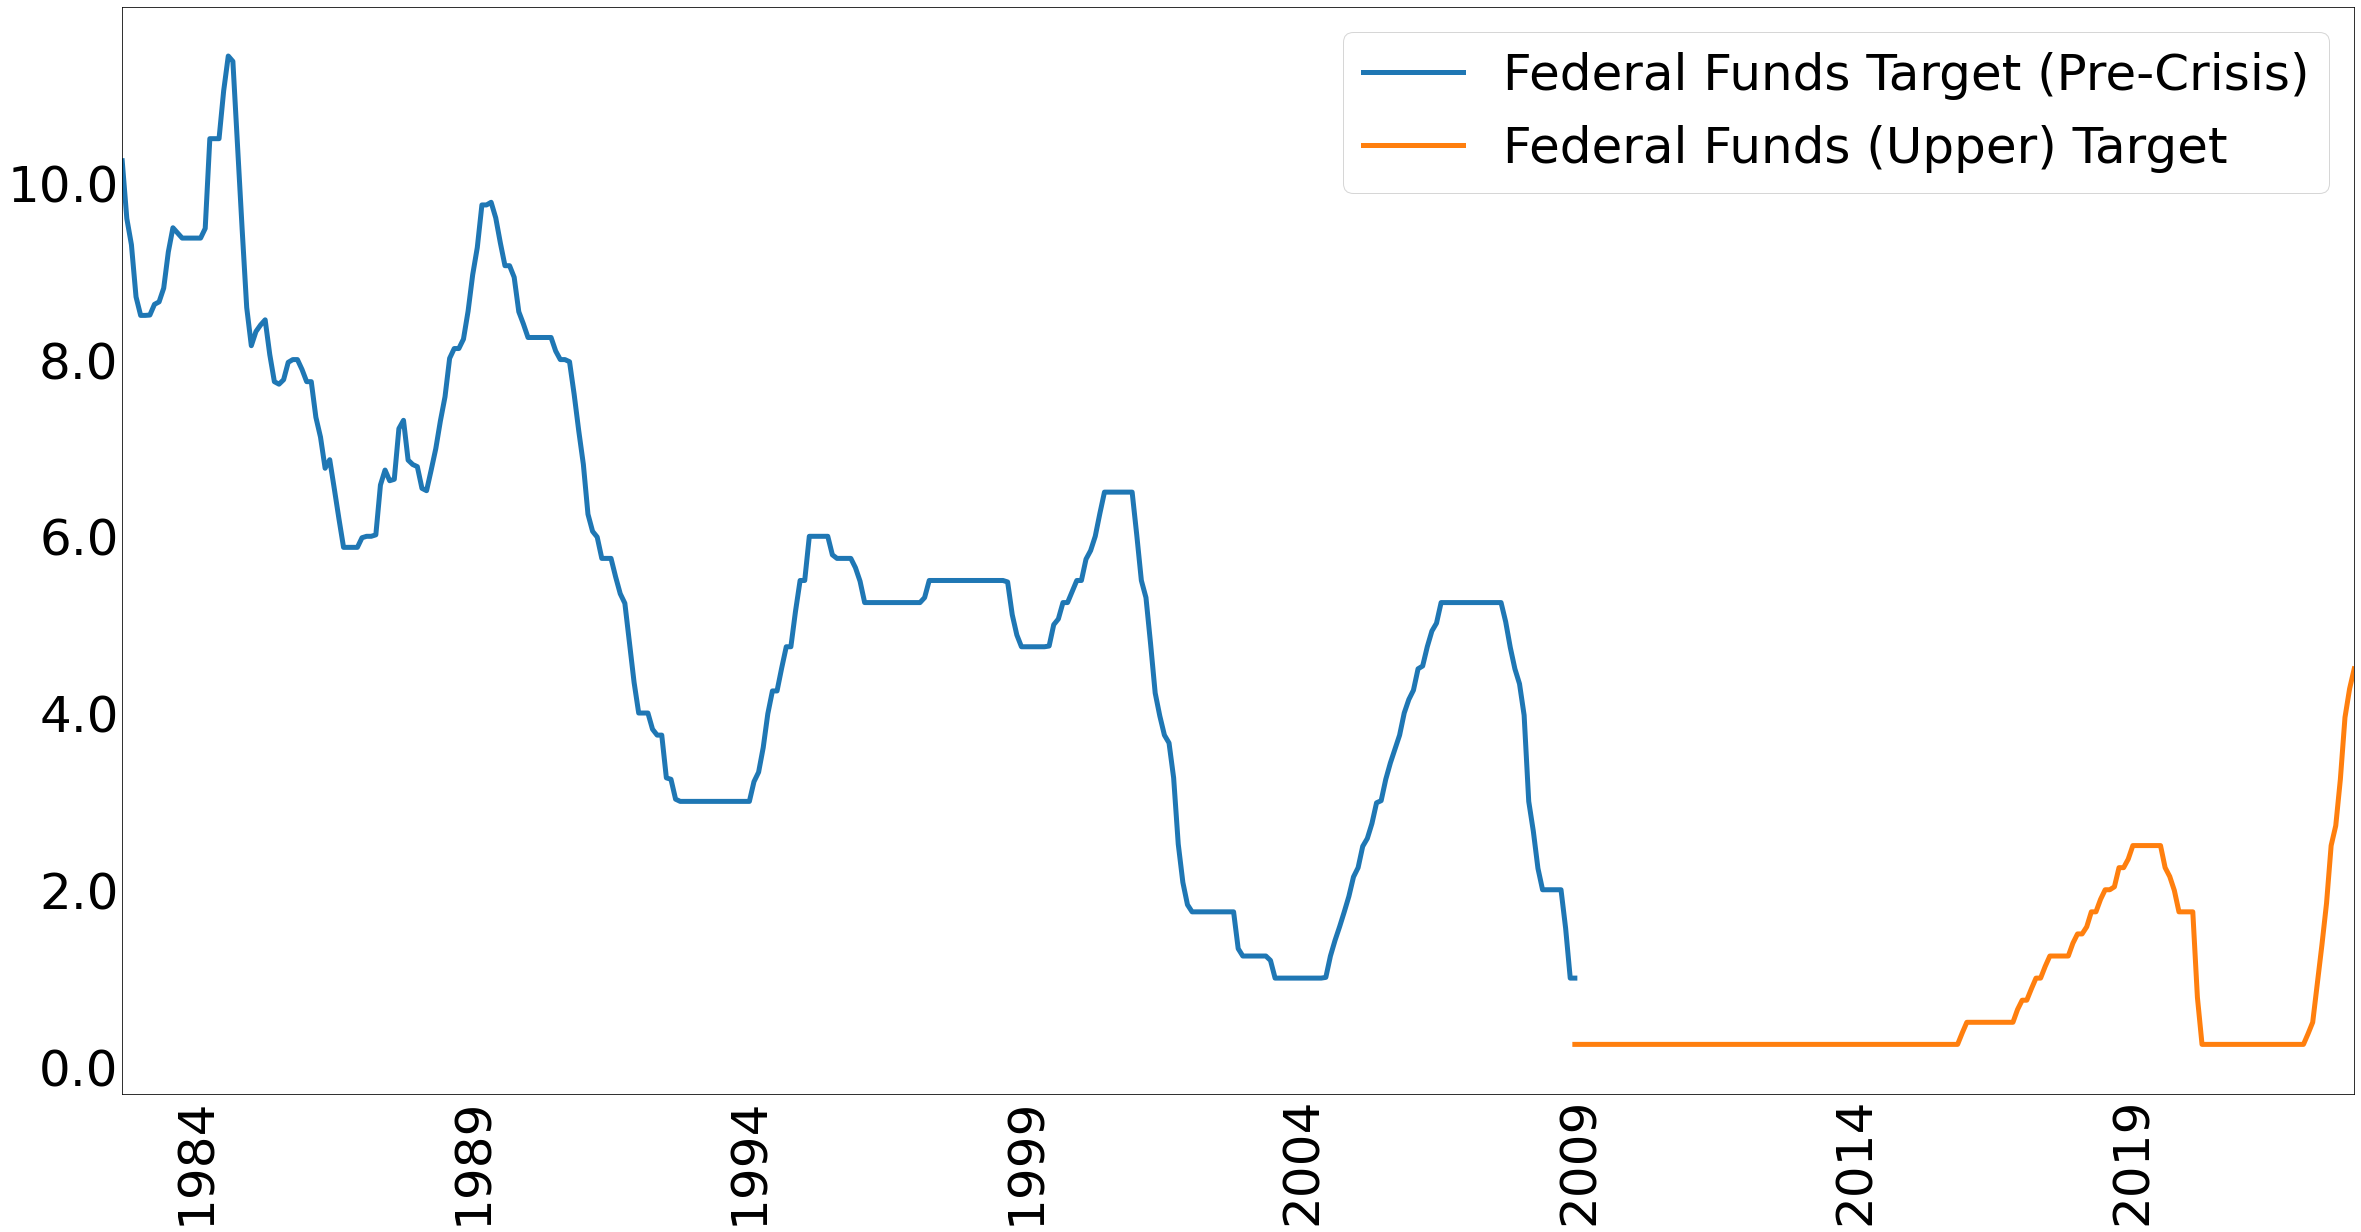

In [11]:
plot_data = data[["Federal Funds Target (Pre-Crisis)",
               "Federal Funds (Upper) Target"]]

fig, ax = plot_lines(plot_data)

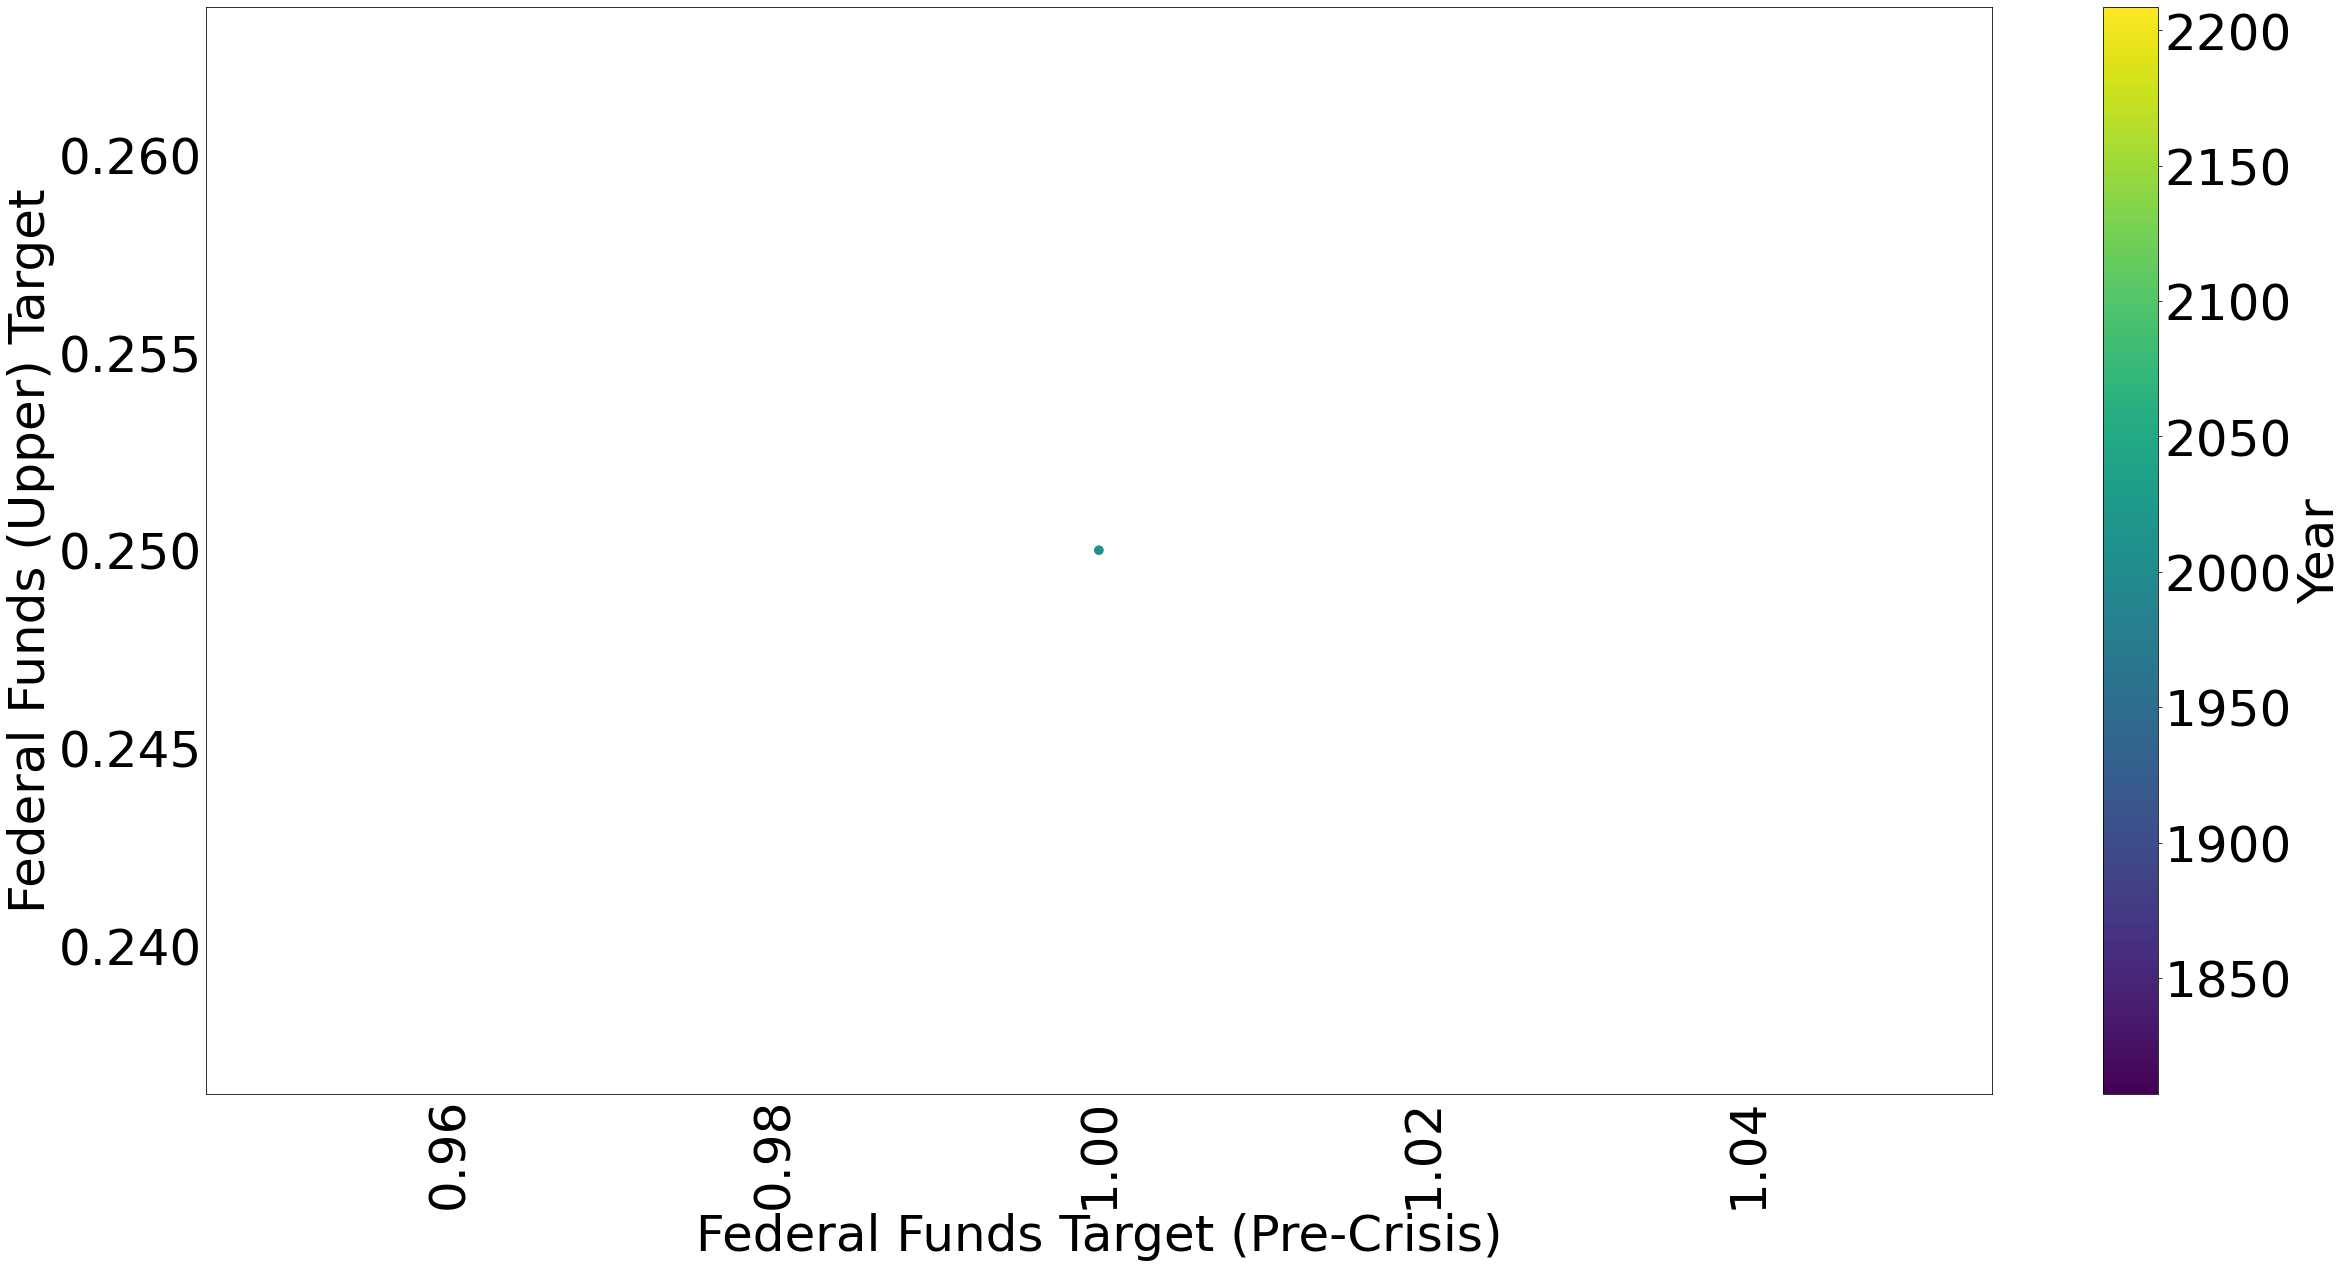

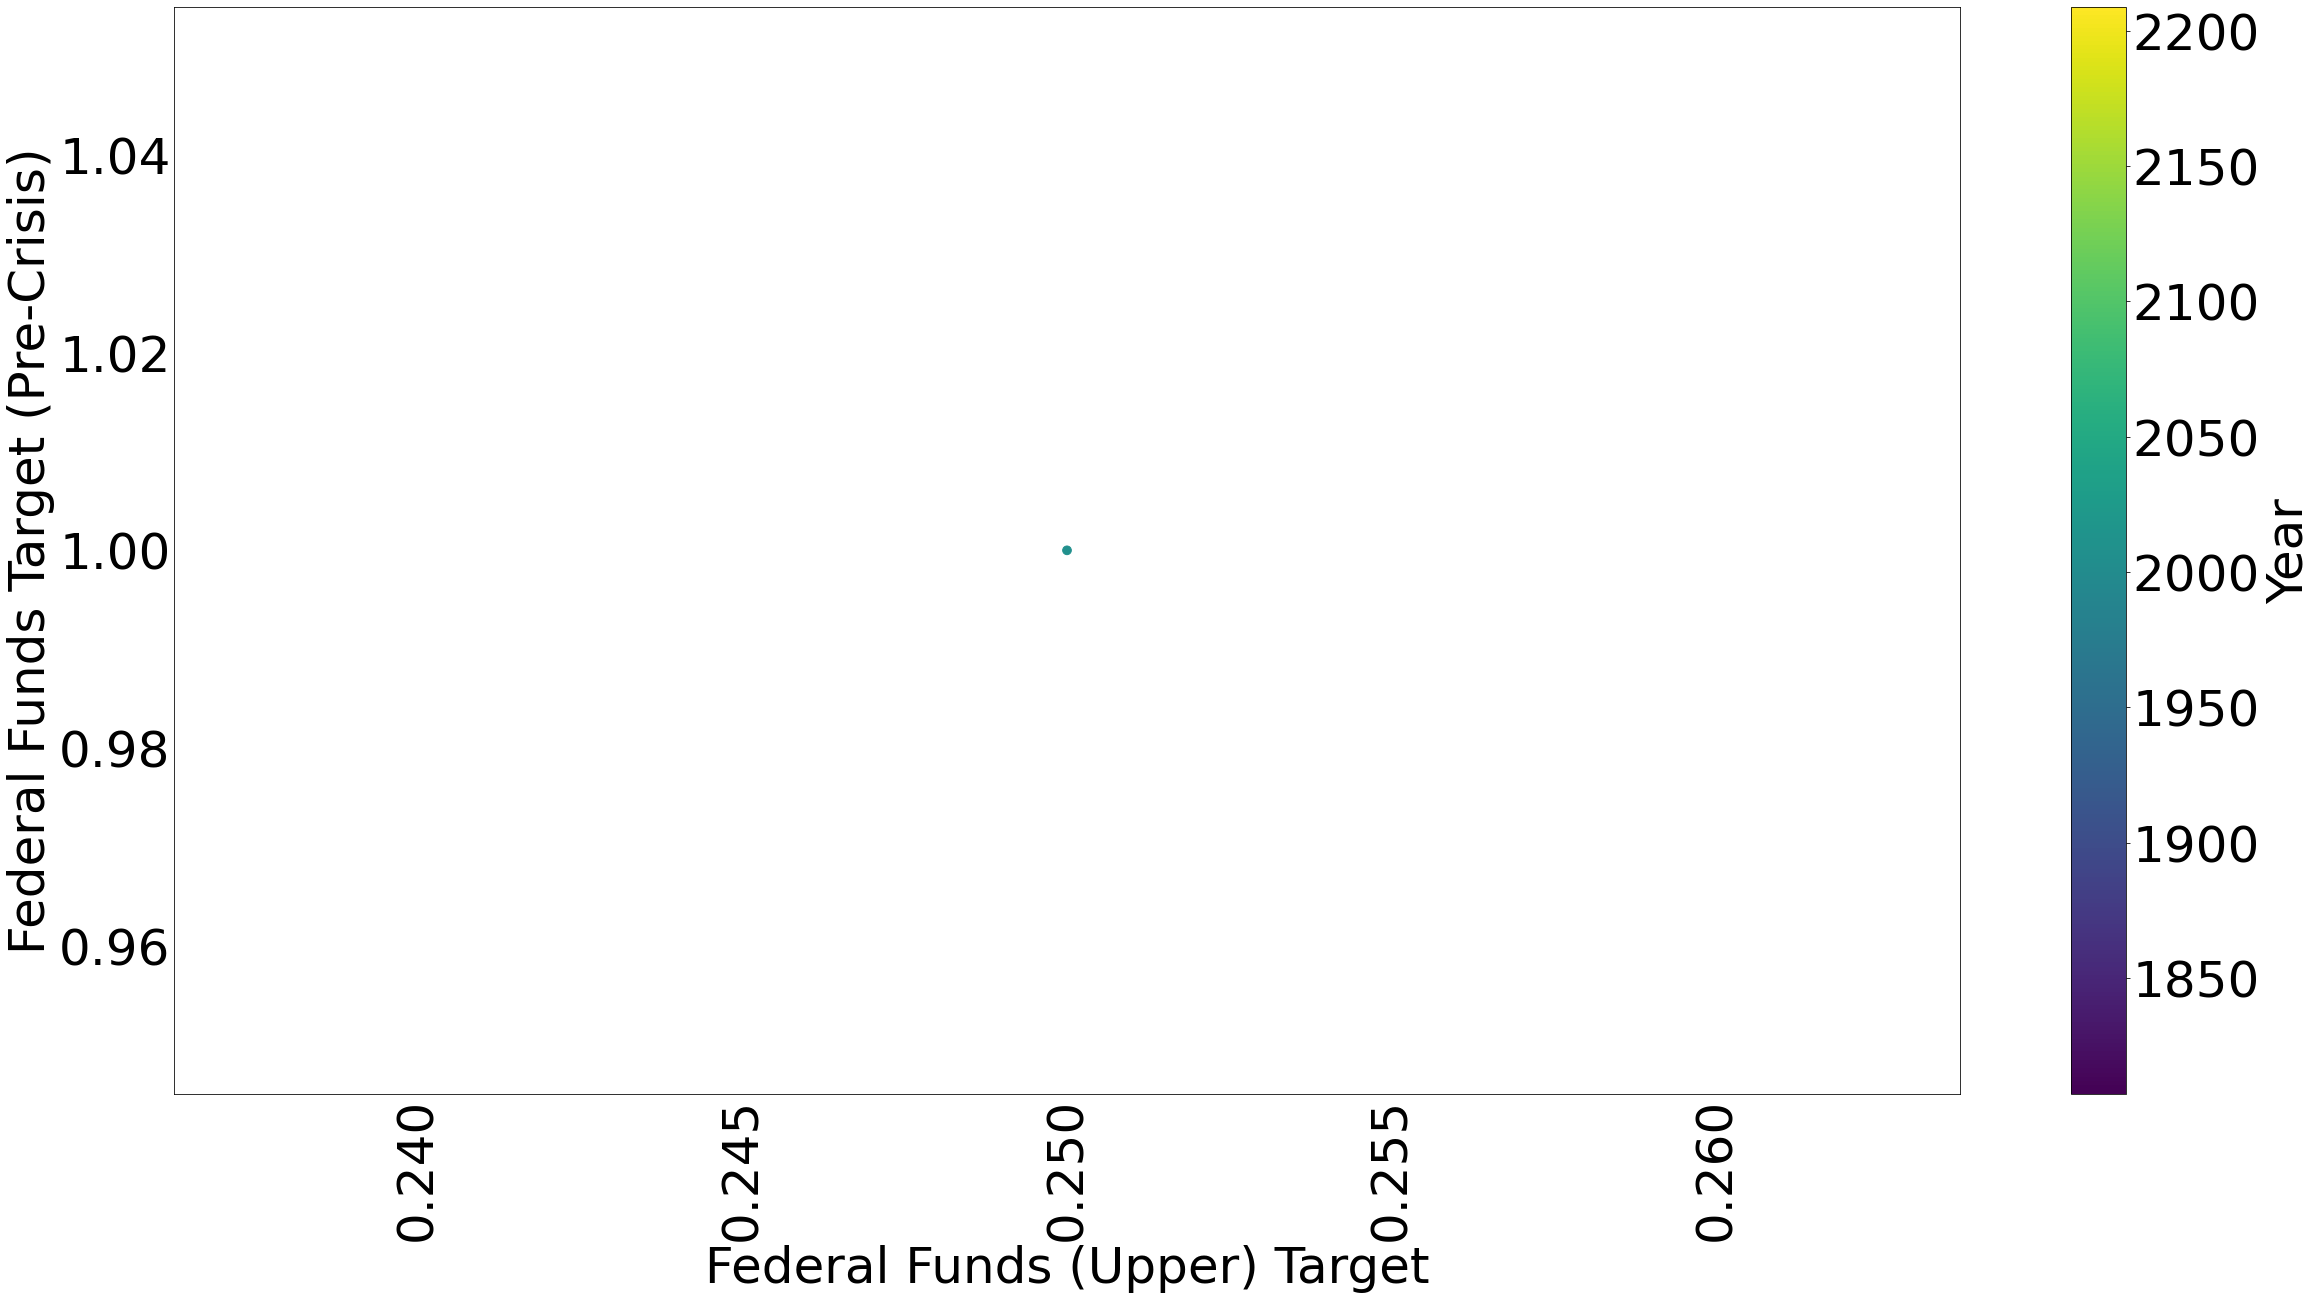

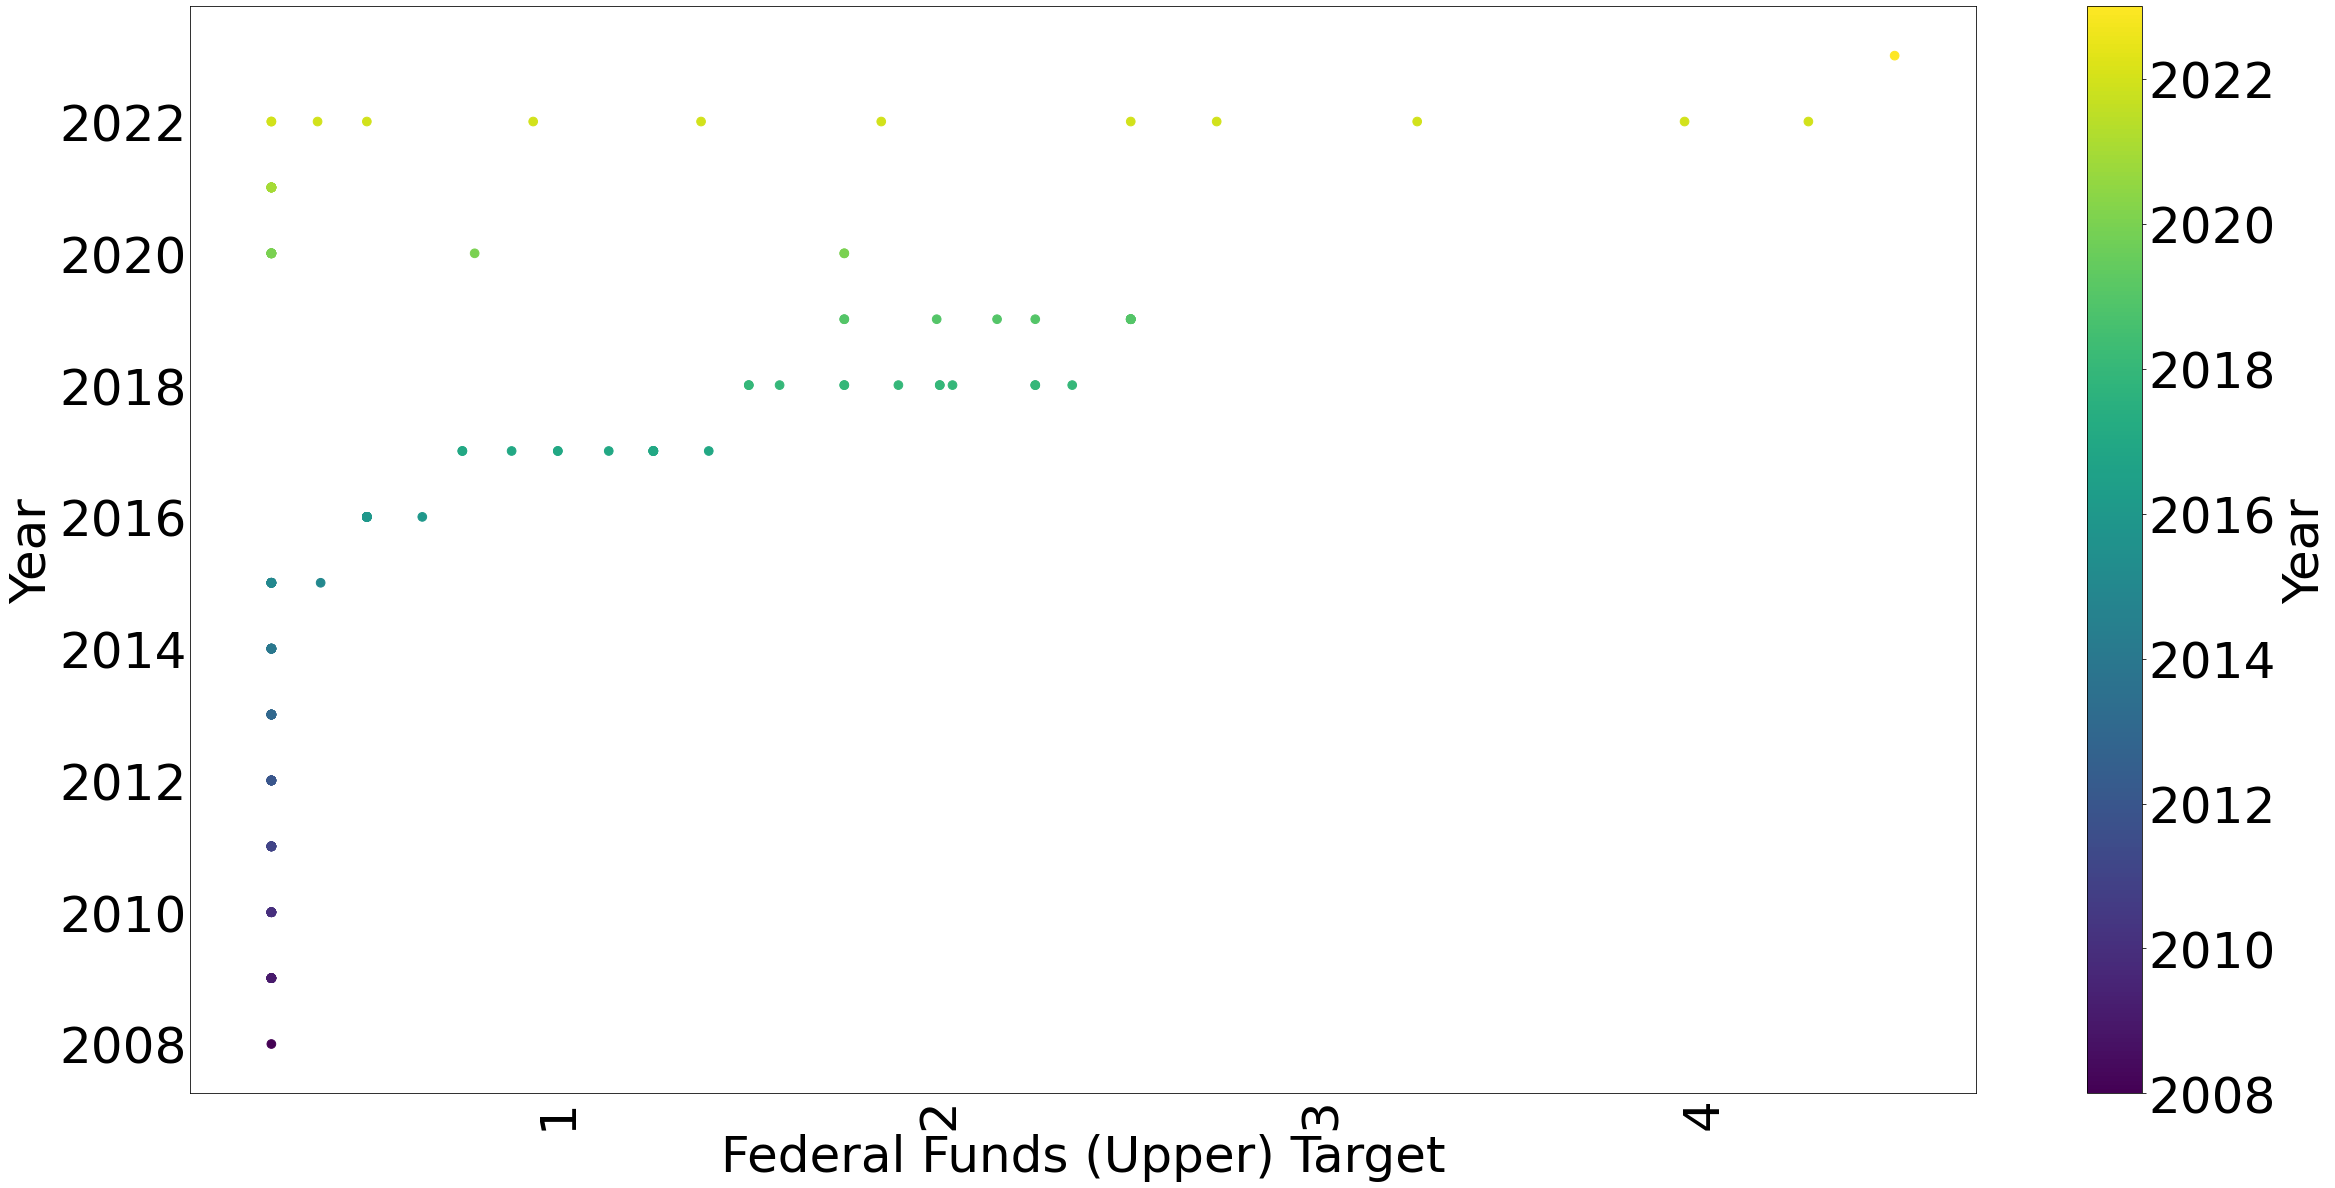

In [12]:
scatter_vars = ["Federal Funds Target (Pre-Crisis)",
               "Federal Funds (Upper) Target"]
plot_ts_scatter(data[scatter_vars])

## Question 2

In [13]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "Q"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
            code, "fred", start, end).resample(freq).mean() # .first() or .last() or median . . .
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [14]:
data_codes  = {"Nominal GDP": "NGDPPOT",
               "Real GDP": "GDPC1",
               "GDP Deflator": "GDPDEF",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               "Effective Federal Funds Rate":"DFF"
               }

start = datetime.datetime(1948,1,1)
end = datetime.datetime.today()
data1 = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq= "Q")

In [15]:
data1

,Nominal GDP,Real GDP,GDP Deflator,Base: Currency in Circulation ($ Mil),Effective Federal Funds Rate
DATE,,,,,
1949-03-31,274.615053,2107.001,13.053,NaN,NaN
1949-06-30,275.516456,2099.814,12.923,NaN,NaN
1949-09-30,277.914149,2121.493,12.863,NaN,NaN
1949-12-31,281.447280,2103.688,12.864,NaN,NaN
1950-03-31,284.763369,2186.365,12.845,NaN,NaN
...,...,...,...,...,...
2022-03-31,24577.000000,19924.088,124.174,2242.312692,0.121444
2022-06-30,24971.120000,19895.271,126.907,2273.725231,0.766813
2022-09-30,25289.620000,20054.663,128.269,2277.949385,2.182935


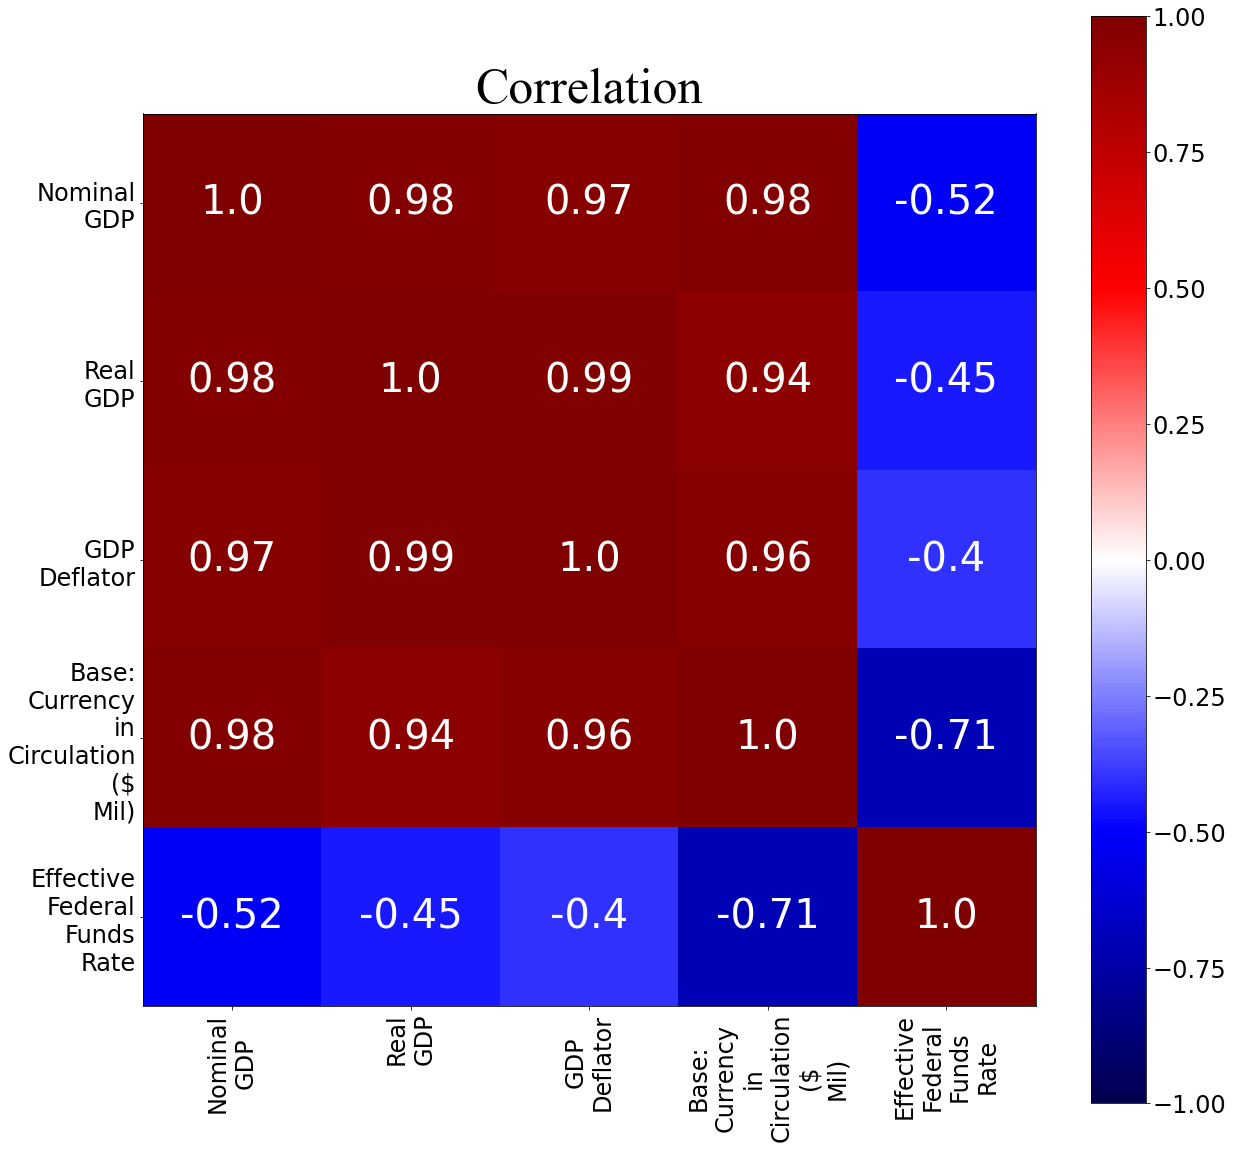

In [16]:
def corr_matrix_heatmap(data1, dim = 20):
    fig, ax = plt.subplots(figsize = (dim,dim))
    im = ax.imshow(data1, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = data1.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ","\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    #put all of the options chosen above to use and create the correlation figure
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,j,str(round(data1.values[i][j], 2)),
                          fontsize = val_font_size, ha = "center",
                          va = "center", color = "w")
            
    title_font = {"fontname": "Times New Roman"}
    plt.title("Correlation", fontsize = 50, **title_font)
  #          print(i, labels[i], j, labels[j], data.values[i][j])
    cbar = fig.colorbar(im)
    plt.show()
    
    

    
    
corr_data = data1.corr()
corr_matrix_heatmap(corr_data)

In [17]:
data2 = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq= "Y")
data2

,Nominal GDP,Real GDP,GDP Deflator,Base: Currency in Circulation ($ Mil),Effective Federal Funds Rate
DATE,,,,,
1949-12-31,277.373235,2107.99900,12.92575,NaN,NaN
1950-12-31,295.915350,2291.11050,13.07900,NaN,NaN
1951-12-31,334.581306,2475.44875,14.01300,NaN,NaN
1952-12-31,359.561150,2576.65800,14.25500,NaN,NaN
1953-12-31,380.256758,2697.45625,14.42950,NaN,NaN
...,...,...,...,...,...
2019-12-31,21436.952369,19036.05225,112.31475,1744.674827,2.157260
2020-12-31,22087.987945,18509.14275,113.76850,1947.869547,0.372240
2021-12-31,23408.615000,19609.81175,118.86550,2168.853808,0.078685


In [20]:
yoy = data2.pct_change(axis = 'rows')
yoy

,Nominal GDP,Real GDP,GDP Deflator,Base: Currency in Circulation ($ Mil),Effective Federal Funds Rate
DATE,,,,,
1949-12-31,NaN,NaN,NaN,NaN,NaN
1950-12-31,0.066849,0.086865,0.011856,NaN,NaN
1951-12-31,0.130666,0.080458,0.071412,NaN,NaN
1952-12-31,0.074660,0.040885,0.017270,NaN,NaN
1953-12-31,0.057558,0.046882,0.012241,NaN,NaN
...,...,...,...,...,...
2019-12-31,0.037328,0.022944,0.017945,0.050349,0.175663
2020-12-31,0.030370,-0.027680,0.012944,0.116466,-0.827448
2021-12-31,0.059789,0.059466,0.044802,0.113449,-0.788618


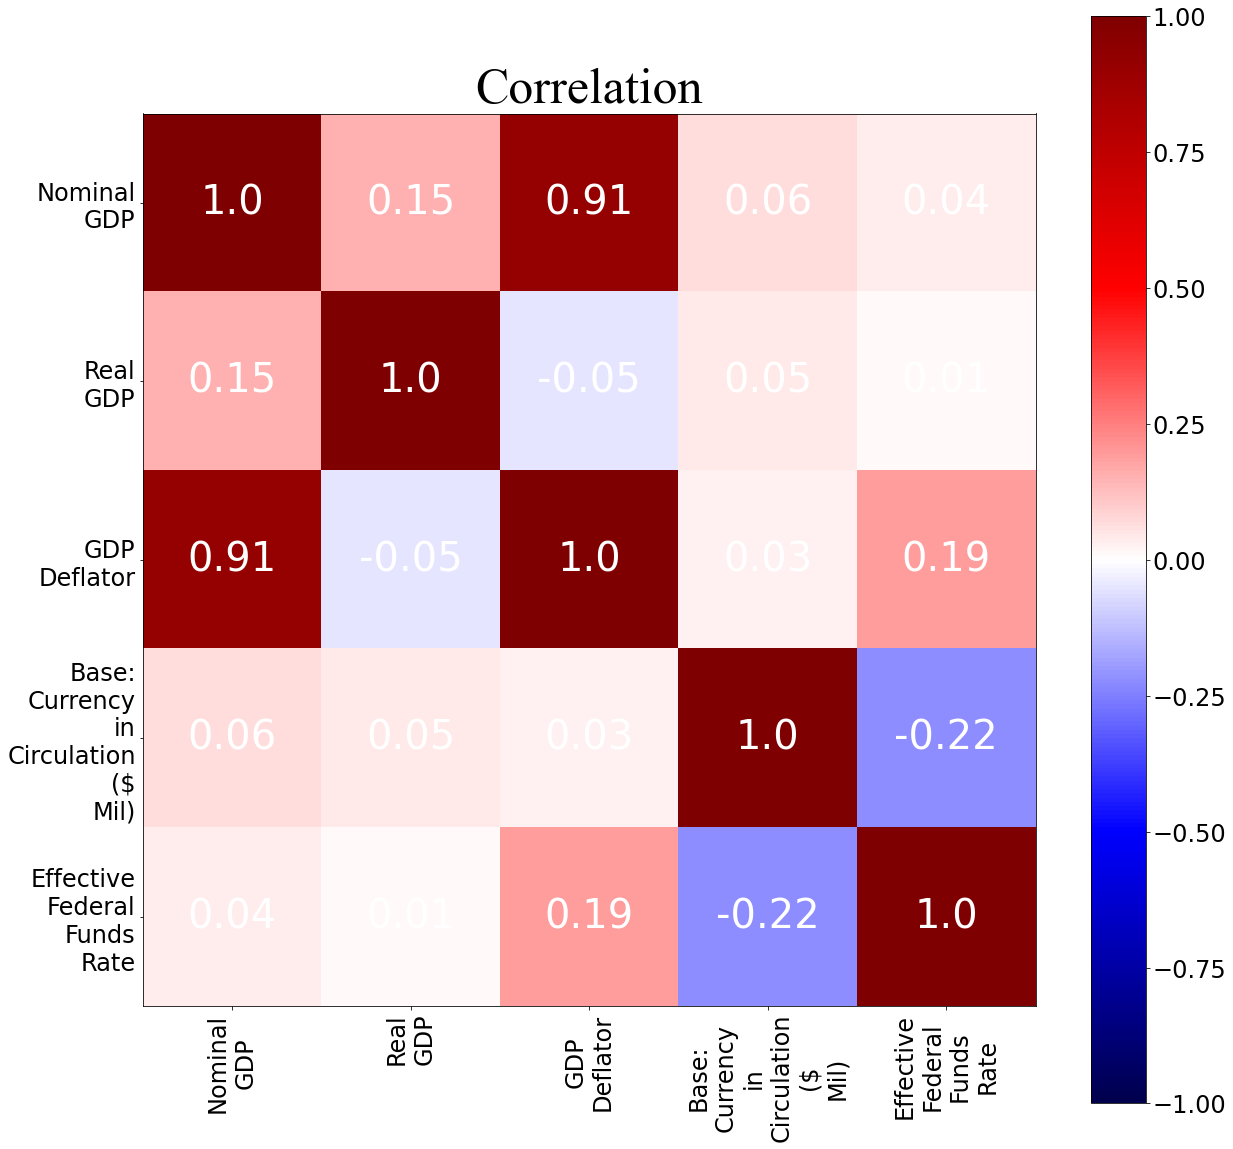

In [21]:
corr_data = yoy.corr()
corr_matrix_heatmap(corr_data)

The correlation between each variable has changed negatively. The correlations have decreased which means there is not as much correlation between each variable. I think the correlation changes because rather than looking at the data as a whole, it looks at each year individually to find out the year over year percent change.